Probability distributions

Among other things, you know that for a Bayesian, parameters of statistical models are random variables which can be described by probability distributions.

This exercise will test your ability to visualize and interpret probability distributions. You have been given a long list of draws from a distribution of the heights of plants in centimeters, contained in the variable draws. 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import uniform, binom
import arviz as az
import pymc as pm
import bambi as bmb

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
draws = [4.8965301775481835,
 2.7773683448746667,
 10.09075099583615,
 2.248355277758697,
 4.97445385956666,
 2.8525720557785617,
 1.9606485835258463,
 9.094001197650389,
 2.899645995467589,
 8.161014208247678,
 1.503981043342368,
 6.309643538930294,
 8.819082426904082,
 1.472813045574119,
 3.3109342512394484,
 4.160426132108971,
 2.6415037488618496,
 3.1823911047498967,
 3.817530539696663,
 0.813917642532874,
 4.705473458436465,
 7.567654928054196,
 6.638599206574339,
 9.225237326175618,
 6.059396001083125,
 5.1688387018428505,
 1.9464995981472386,
 6.810117893623463,
 10.676522519332437,
 1.8775437181436003,
 6.6514259904579855,
 6.281449023694078,
 5.686804206248281,
 3.040669660568242,
 5.445771681453278,
 6.137626275556993,
 1.4504266747917158,
 2.7248017861733183,
 5.441528485945541,
 23.287886259437997,
 7.378805523147815,
 17.46164381813782,
 7.022037703725257,
 4.455229394528674,
 7.447486653808096,
 12.787408062431034,
 4.843582477607285,
 12.602574971096132,
 7.951292308896766,
 3.505240909278769,
 2.60024643752069,
 24.428787382833804,
 11.735283933502238,
 3.450840678316158,
 11.764142831418265,
 5.8869787550069095,
 12.50100787182161,
 7.035726575325365,
 1.3668674850142863,
 8.532664099738373,
 6.4845209692439365,
 9.459521967341786,
 3.0968299214246353,
 8.994194650997503,
 7.217492341180439,
 2.9846029922338992,
 5.5413434355121485,
 11.028293841432431,
 6.997978563849127,
 1.8967756815850572,
 3.4896750690232463,
 1.3973862586242172,
 3.6729178521859587,
 3.300249292858794,
 0.677237819218122,
 6.780921143833963,
 16.621949791143404,
 14.49437373194433,
 4.900752876911078,
 6.33025452844412,
 8.529258748167589,
 4.061587951216941,
 8.316249406254965,
 6.224342678269894,
 8.570359553597006,
 5.8076171945080155,
 6.272069339298634,
 2.93705381562279,
 13.753493356819767,
 10.466127836744073,
 8.182633391912846,
 5.130211214118871,
 10.322217649086447,
 3.794499006745956,
 22.27159844203285,
 1.7156489655367402,
 3.6079800463908827,
 9.745297233988953,
 7.5081325997719475,
 2.974391018146289,
 3.11757137359702,
 4.787755547507754,
 2.032108628828073,
 6.901631482232061,
 8.076072741534293,
 8.834150451849643,
 2.0525280653743145,
 7.659139249435944,
 5.214211883498418,
 8.553546908035862,
 0.7912126628569208,
 7.604896005352201,
 5.294420593802395,
 4.498339235352354,
 1.8578997835103677,
 3.486374388333293,
 4.138171280319127,
 5.9937942175630115,
 6.553130930802453,
 1.5633220327044692,
 7.396762067066193,
 3.5913647897596057,
 18.73429445227849,
 3.000088398484281,
 2.7224081099832307,
 3.6865694997558682,
 7.984935583267683,
 5.0720757229209505,
 8.72077876350736,
 3.7741574157850906,
 10.614812579867522,
 6.318743044233054,
 2.8411807914909044,
 5.877014329467197,
 7.624169142156499,
 6.981545938047454,
 6.267027366404445,
 5.8892423527736435,
 2.3641997030490405,
 4.724516550082239,
 1.216062798348527,
 4.902670490620337,
 15.459813597778023,
 1.930869555073497,
 3.6453315190900533,
 4.950235568480353,
 4.094582676227654,
 2.2848294832059097,
 4.148103201187176,
 11.096085421022291,
 1.9544093845360013,
 3.7392646478497182,
 1.7140511015108322,
 10.861218336487164,
 6.0811926119588104,
 4.814600131675577,
 6.036494162806388,
 5.006883539416672,
 5.856228696682475,
 1.634080226878699,
 8.723424258004435,
 2.314873327253421,
 12.095524412720785,
 4.239169333332656,
 6.3884357177222455,
 6.871889970174317,
 2.7061560496086843,
 2.258544049539036,
 5.153573117198798,
 12.998844179568334,
 7.344313157227548,
 4.819491523259172,
 2.791384985294565,
 1.7891944295314168,
 0.3887162863444724,
 3.2944108380260535,
 4.964786417716283,
 19.363963125814216,
 0.9728859083578121,
 11.575721627454586,
 1.390587768822153,
 7.565775788822752,
 2.9946001811759464,
 2.2262337422393066,
 3.9794422135012533,
 7.286361745080506,
 9.881253193045426,
 1.0620834251622124,
 0.25566391189111637,
 2.822060670295995,
 13.384458706236522,
 5.383003489244037,
 18.727711478498165,
 7.581119130143035,
 4.764825891215389,
 10.457447420642374,
 5.209232266589747,
 9.947142948966183,
 1.5533392568733928,
 4.743662938002477,
 2.334869995601277,
 2.966618124329659,
 9.162695197233484,
 22.178303119743852,
 2.4820552350621017,
 10.810482944518528,
 8.233067904552449,
 11.51255471530558,
 9.398048805003322,
 0.936269054048519,
 10.965501697263264,
 4.667399924971561,
 4.535124864740272,
 6.881082927105499,
 8.748102942359605,
 7.652481663795351,
 1.1739935979021945,
 7.607879522874456,
 5.243681726932997,
 2.421267885783328,
 2.387663960792246,
 3.616705592662269,
 6.155883276606518,
 1.7668686294084361,
 11.350764688905219,
 8.000186568774186,
 8.822504758135635,
 4.8326858258205645,
 7.776813446454444,
 9.220651094988366,
 11.209851650480697,
 9.925348890246516,
 11.324109721824145,
 6.262200452235572,
 7.8783054537496495,
 5.241599754633588,
 1.2696130054942918,
 3.690261439596566,
 2.9825153533952813,
 10.068770309254695,
 4.982380020872159,
 4.159627202848911,
 6.966435329745846,
 8.894016719228608,
 10.11742416872297,
 10.192979926704531,
 3.644345092280056,
 4.636434766679974,
 0.7181786211614298,
 3.968923750894647,
 10.483013801887251,
 0.4234731443466793,
 3.0233859635630456,
 3.0950970799942406,
 12.290973079176585,
 23.001966241376905,
 3.365968114190592,
 5.764711855108637,
 14.250017855296015,
 3.781747038809526,
 8.230053448741417,
 4.821970338327995,
 12.736992202554532,
 5.813435426310353,
 7.591737823416572,
 8.331003733764355,
 3.162515835420474,
 10.850887555837463,
 9.517298096251565,
 6.531632757361032,
 3.270365953896965,
 2.640019412787835,
 4.05803179080781,
 4.3541093515354925,
 6.5543720719662915,
 21.240967435187482,
 2.4276498499558943,
 3.415522878182096,
 1.0110160487301965,
 1.5680519976416054,
 3.5402916696048425,
 0.7270337310620506,
 3.1052253118313606,
 19.28687285590875,
 6.8225847490937195,
 2.478947417827959,
 9.938331217355131,
 1.717745414648466,
 2.0740506363080136,
 6.120883604058732,
 9.816659292311266,
 5.468195099093276,
 1.4047686838600026,
 19.679504404484604,
 3.9522795630338488,
 2.614234327066742,
 16.770027629144884,
 21.882801949994096,
 1.4774265558683557,
 12.775103506543012,
 25.64129886200839,
 2.5067627153143963,
 2.0615507953603527,
 4.492974060241592,
 6.805938601245078,
 9.228893959657004,
 13.434619835267807,
 4.517357853088279,
 2.707303828460232,
 2.5747608522751615,
 8.169356047925593,
 8.98474685727378,
 2.969090283895119,
 6.063691782786532,
 7.555988520778799,
 3.6210859456386784,
 1.7186071731795336,
 9.29334965130937,
 6.606884318486686,
 2.360382617244684,
 10.567983553506833,
 2.354711089570154,
 2.4036685923173016,
 7.633245518968488,
 5.2086864278800205,
 7.2369675612962325,
 5.877253627129102,
 1.538894844680058,
 2.9391433162624776,
 3.4126860440952944,
 2.4714620246786465,
 12.882442603170558,
 8.715300943220665,
 6.777153956257582,
 11.590644778358943,
 3.2744494215048396,
 2.3454754653637284,
 8.429413856438678,
 1.25933955141864,
 0.7458461378138801,
 16.128198588389047,
 5.043456498733317,
 1.9297001496980881,
 5.8070632211874145,
 4.378267161078915,
 4.580350383430805,
 14.734360249297678,
 1.2180343859243183,
 3.497782052986346,
 13.908346127352957,
 4.993467279508573,
 17.2604135254941,
 5.978403157441747,
 1.2633490664345,
 1.6878932097890256,
 11.233969610511588,
 6.178924906638022,
 5.524792124286643,
 13.412832103272585,
 3.0805385089857467,
 3.9566440173670405,
 8.132823066567113,
 10.044716554325507,
 6.293235011614243,
 5.4847398922479265,
 8.275467312036588,
 1.1652276228884164,
 13.259317071100014,
 0.7672061928536305,
 13.236350417286474,
 17.512504891281235,
 5.613503790764481,
 4.151034540911776,
 3.213084726945919,
 2.4357876564909375,
 11.329302963604526,
 4.9953098982312225,
 8.651087769778991,
 6.16374471340538,
 3.3338282230762557,
 10.758450102790967,
 3.169227876753708,
 3.2961771650430185,
 4.39662750077084,
 3.9246148043243765,
 9.380902647650963,
 6.740282284684317,
 4.372154573316282,
 6.77924721748739,
 8.631872343334337,
 1.0963109916805938,
 6.476896272855683,
 7.5397510075958305,
 0.2875287319729725,
 6.262062744764263,
 6.759450271855107,
 15.626902947802634,
 4.049479009079418,
 3.128565368118112,
 7.588136469962001,
 4.540081936256318,
 10.200929301373206,
 11.564010266778318,
 10.122329965830675,
 10.447418782357932,
 14.067197168231711,
 1.7868996586057917,
 1.689823954655018,
 8.585273420015016,
 6.350331907494047,
 1.951382269189539,
 9.172502866924448,
 2.6791155756139498,
 15.293743721392204,
 2.8789440089268576,
 1.1909375010108063,
 1.3699643399676522,
 6.779271742841424,
 1.5953996147754097,
 6.533748674706482,
 9.231350020684598,
 3.7351710822967847,
 3.122656912412224,
 3.0682587354328943,
 5.491993373177026,
 4.74664239968147,
 2.1392413242935766,
 4.352483097351942,
 13.84529775991863,
 4.462530324686005,
 2.2748680748859,
 4.749870284002664,
 1.742717949703708,
 2.3071502744887873,
 7.579437282705074,
 8.275724335729013,
 8.97824558142635,
 2.8491197754150983,
 12.09449332984802,
 2.7719620142359003,
 1.809116570394484,
 0.612849065001341,
 2.755667676621122,
 1.2702382671526353,
 6.545116189535342,
 1.9169557674432811,
 0.5083249939244322,
 3.3764291811262033,
 8.741375030628953,
 2.4563735573539454,
 2.6656259647246188,
 1.465306882318185,
 12.91535985915546,
 22.927002169998588,
 4.744799286846495,
 6.332555361938065,
 5.317626055376757,
 6.323099662069659,
 5.237396695723942,
 2.234047172965252,
 6.541351968546181,
 3.7420353092883056,
 7.537781155060327,
 1.1573924752100018,
 7.093712228841238,
 1.7179688088591307,
 6.850538065012454,
 0.7142527543401466,
 9.242509535068285,
 9.931768670478174,
 5.981866906557009,
 16.572736668116004,
 2.556252892839046,
 5.1615402372442265,
 8.263113679091955,
 3.212653434830585,
 3.2752827448220208,
 1.1413254243521802,
 1.852246216244692,
 8.328668044777775,
 14.889743907212583,
 1.292968493793878,
 12.654418904293216,
 5.632495847913354,
 8.335870248053988,
 6.11120006807641,
 7.181689738030428,
 0.30117787663753925,
 1.3518964257032553,
 1.7429314668709561,
 12.969147454534475,
 1.4502513792379155,
 9.869963143334132,
 3.3812359336371154,
 4.143942739666384,
 11.41718403327608,
 1.0002784346038303,
 6.607423711389968,
 2.224621610978951,
 2.184833284451387,
 6.433702450635437,
 2.6052100871661343,
 0.653946941132151,
 5.247193629711625,
 8.082276866757628,
 5.098789488378176,
 4.787247472461878,
 0.367492363876636,
 14.979327161369453,
 5.146768072584807,
 11.078096791404963,
 3.5438763706553402,
 3.0532851161507457,
 12.915548285810027,
 4.040937135716328,
 1.9511247881586873,
 3.4482767740851097,
 6.406903837828583,
 4.524080151549477,
 1.2710599597905812,
 6.5799192881160735,
 17.736842112980497,
 0.8363056091995451,
 2.0024213140522953,
 7.383797251954357,
 1.0242621798471412,
 6.529688736624968,
 5.279120179002009,
 12.066129805819653,
 5.357209311061068,
 2.7337842835425556,
 10.77711204540601,
 9.738676021807764,
 5.494125697333925,
 2.953839652609755,
 1.1794196674371928,
 7.536580210265674,
 2.452680071788385,
 4.234228577402,
 8.53109169900565,
 5.08509251057259,
 8.294012418678493,
 11.656286327968715,
 6.062014000416124,
 10.44082459220859,
 2.947791203266952,
 6.104970240858,
 12.013964748067952,
 0.8257884132877362,
 4.231833052692528,
 2.390507800896685,
 5.3144018442582555,
 1.9110812153266152,
 4.749344059726498,
 1.228795062850689,
 0.9116812255118245,
 2.1952336308999074,
 12.849809402926175,
 5.874110755465624,
 9.262159140509374,
 3.4739965472351404,
 5.990870655109045,
 6.156145068793129,
 7.493280546056166,
 3.7996529469998657,
 3.0572166637667397,
 5.693414505787664,
 0.9520154669529208,
 8.179719259776952,
 6.453012651843069,
 5.495684992266883,
 5.655666182355805,
 2.6626909613914904,
 3.0322920855214734,
 9.707666141080965,
 3.612690857667645,
 0.5010376634288283,
 8.820937508988777,
 7.348983613321222,
 5.062597804731972,
 2.4271435140036637,
 5.303552847472162,
 10.278982428466357,
 6.189930246322991,
 7.28693620724938,
 7.120541779176342,
 1.3521629903771077,
 3.9104971730437446,
 7.25942308498736,
 7.096627283985876,
 8.938354847187869,
 1.7037283633898317,
 6.420546713002836,
 3.1607509180312516,
 10.325186131338285,
 1.7233505968314828,
 10.993618309750204,
 2.5440356960632418,
 7.450771411839753,
 8.599832960221548,
 11.427748994397337,
 8.851277038800724,
 3.5672455619074603,
 2.2361756454674158,
 3.8207608090227456,
 0.3181068150492243,
 0.810943154259554,
 3.2630328436495657,
 1.250675958908814,
 6.489136241273526,
 6.107229764702323,
 7.0811028437704255,
 8.600868350099315,
 6.225062321890379,
 1.1988643926123228,
 0.8198763641255287,
 1.561364462108904,
 1.790589418591302,
 5.774072679081045,
 7.038912699781006,
 10.229506398410164,
 14.204248150427343,
 8.668480399190184,
 3.189023587383251,
 4.380062551735003,
 4.159513769660227,
 17.992820958339447,
 5.390958485645765,
 9.929198222524583,
 0.9554959109753148,
 10.20920350582043,
 2.2118714843124,
 2.371882200563874,
 28.23109027261195,
 1.4300153564807645,
 5.159811011504411,
 4.7688049474252185,
 4.5013622551819585,
 4.825518183442997,
 15.500089415614681,
 5.123380256824756,
 11.30096862730824,
 10.99011521467527,
 21.298123251036607,
 2.857931131811339,
 11.635571549037941,
 2.6170008645664007,
 1.1211664405370847,
 2.9984894193537492,
 2.0070777792597716,
 6.269031441965848,
 4.49934975962436,
 8.922460972834351,
 9.211672613189876,
 4.607685688333495,
 5.597154008195834,
 1.745247441286537,
 4.407668681209677,
 5.036506829498581,
 5.090385157025575,
 6.653927151640081,
 3.7655514115521678,
 9.199606307636115,
 5.131802130732497,
 13.019289243547512,
 4.274044006647504,
 1.9645165298100227,
 10.113079380067324,
 1.138354978460403,
 6.119751841041822,
 2.6453221731510506,
 4.652479767729518,
 6.741501524410957,
 2.824189921285613,
 6.414377573880686,
 7.885790818157123,
 2.845601036297348,
 0.9141225560743006,
 6.310065316421408,
 7.262117091048994,
 2.5475609606979686,
 6.090943463505721,
 3.633167412096047,
 3.093328805230971,
 1.716624489132693,
 1.3891395769364385,
 3.537552958733612,
 3.326745707416519,
 8.630405671026278,
 2.8671324901362207,
 6.595612150714583,
 8.60915034728236,
 9.080603678778086,
 1.3037830489357662,
 4.525739254554866,
 12.776047626929874,
 5.427301703464586,
 1.6254187707994188,
 3.0104205987544823,
 11.064876746229636,
 7.3873953430209784,
 1.9333957735711258,
 4.378642429737533,
 5.8042914791779605,
 0.9413843452975408,
 14.308706295462244,
 4.9093995903761,
 1.1449339553472129,
 11.744073615854735,
 7.50462156926789,
 13.668209053942773,
 2.779504731361796,
 7.428031411648583,
 1.631572856821135,
 5.6748580186618565,
 2.7215088816436257,
 4.595976077603295,
 1.3477529029558672,
 3.236908417319497,
 1.3449983459213477,
 4.46441349817884,
 4.415156035824411,
 3.270644526179391,
 3.576341933991703,
 16.795492963920044,
 5.024992794464341,
 10.839956744331515,
 5.211133771291584,
 3.999904412843091,
 3.0221900423172983,
 12.806566637097404,
 3.6170182962807638,
 7.51017695945965,
 2.364396118026336,
 7.044743843801976,
 6.034605812353842,
 6.74247710009173,
 2.1346943555546036,
 4.572103270336938,
 2.0372105595345893,
 3.201204029959717,
 2.74347969742598,
 3.028986408819452,
 7.388489016768098,
 0.7187042393422218,
 27.14830540175104,
 15.091766765932208,
 0.6312387395106359,
 5.048635106449241,
 4.353468136139131,
 10.56631865941479,
 15.104617555145705,
 1.3782197613626992,
 10.148440627682271,
 7.475917986735643,
 5.261947294020046,
 4.189795256539101,
 1.4247445096837736,
 9.501768731168145,
 6.885299725223753,
 10.635421383026337,
 3.974045491589985,
 4.426850568222672,
 10.906903244108456,
 2.053343928983149,
 5.998392976580869,
 24.30266619382746,
 3.2437089601007036,
 4.618474613556603,
 9.25439812334875,
 2.4095235117863174,
 8.2734435891328,
 11.249019286530924,
 2.2012877736121763,
 1.995797676601916,
 10.381763023083957,
 1.5981529078895416,
 7.39852311966355,
 2.955475886727206,
 6.581432179881192,
 9.466948077520414,
 0.2575141151993212,
 9.16277527065807,
 5.237271653505226,
 4.631456858105715,
 11.076172116109767,
 10.24706256997812,
 15.255522313966027,
 4.035685087903827,
 4.360811115716322,
 26.344695208131732,
 4.722098800614307,
 7.094156625250536,
 14.726229053744095,
 8.49611994806967,
 10.580486300902052,
 1.389760925573671,
 10.537158548544046,
 13.691747730526338,
 8.77924284416558,
 7.376625570555316,
 2.5622523481080206,
 4.09877993135019,
 3.8792995800570846,
 2.028532000506039,
 15.157224073022295,
 5.5477311359073465,
 3.400794153414071,
 5.340838451899906,
 6.983601732760869,
 9.983587707377573,
 2.9946376611294063,
 7.878664360543029,
 9.130531486763633,
 6.458601809029941,
 4.745170491720853,
 2.44457987771486,
 0.13295763700086757,
 5.570045970856251,
 4.019519774376992,
 7.951454882909795,
 9.599551738115972,
 6.945412793983447,
 13.7031122129087,
 1.0092115489208513,
 8.130004253066282,
 4.295965729850911,
 1.3550227277553972,
 7.0899179399999355,
 8.095694957375088,
 9.778425785758577,
 3.075330952198364,
 1.1352402744610477,
 1.4637706641374473,
 5.675249736402116,
 0.46948162557804063,
 17.095078238250064,
 5.274709846569343,
 4.746996539174454,
 0.8799272319435474,
 8.168354433510176,
 1.1037915283909148,
 11.39141373217088,
 10.67107590202739,
 4.462680072976456,
 2.8469390815756226,
 4.488422997958625,
 13.184258772855575,
 3.163344135139875,
 6.18243551594477,
 1.6147969470324584,
 3.571063767611684,
 6.949828001847623,
 10.434172213174005,
 1.8222035016866767,
 2.667948203315711,
 4.095433377626867,
 2.0054631422348703,
 2.394135785822427,
 8.113781102404925,
 4.22367831924227,
 7.102395167567896,
 5.43078886506097,
 5.919020309636933,
 1.6543047661794836,
 6.870038000849615,
 3.277730249179005,
 5.483113823940535,
 2.3974543713586436,
 6.739769461629426,
 5.931793469152378,
 18.72523131751559,
 7.3675493392841425,
 1.045488193446709,
 9.546268496232772,
 7.008688383579497,
 2.628575619263915,
 4.546559808011956,
 6.658054235047042,
 4.634097189643279,
 6.152845037036782,
 3.3002544631066453,
 14.385187928141868,
 1.373581649140871,
 2.2477671929497838,
 11.994630641534483,
 1.2745236482704956,
 3.457954373379483,
 5.415420933983508,
 1.0189000567568718,
 4.158785005157171,
 6.6724467536581376,
 7.679038847848508,
 4.124191165452601,
 2.548773581185362,
 2.0886048606560745,
 10.232204714497113,
 1.307586980494841,
 9.74355240140955,
 0.8857449167616467,
 4.262157437953479,
 3.604735511823079,
 6.552568633911667,
 16.119610131324052,
 4.2708577356999,
 4.34437610160993,
 1.1514258057982247,
 3.888989452015399,
 7.510562190494018,
 11.521194498595811,
 2.4625042194030318,
 2.2799465493041824,
 8.256703839804754,
 4.984656560820838,
 11.08368906072086,
 3.447567324214339,
 10.141386030638657,
 7.479896297693905,
 5.952686663836423,
 2.7931523030567753,
 3.2384878037631566,
 5.328025474345006,
 2.275785101264786,
 13.564161599174597,
 7.814181939319351,
 2.8134576581229687,
 6.594617647495058,
 6.770841616269428,
 5.46558453442557,
 2.038675011607797,
 5.342181687078974,
 2.911115116823764,
 12.119352975675646,
 2.5300877932854924,
 3.273102450724674,
 3.710788584527731,
 2.718807268096408,
 8.570320692931203,
 7.08455631692094,
 5.497393443456139,
 3.37373899367623,
 3.919204648121433,
 4.020560254127167,
 2.2094960431339574,
 4.455733806354891,
 4.938117575427544,
 4.398666981522084,
 5.120664019318565,
 18.307954371303254,
 3.3134423915375457,
 11.708919791896264,
 11.174884997120982,
 0.2693230521888664,
 3.5051562657158954,
 14.731323847471714,
 3.1317015422647305,
 10.819054794917703,
 5.644573123664562,
 4.453797750744496,
 2.105962007294326,
 8.055971142626607,
 7.603479845674556,
 9.104042391844416,
 11.144100796634893,
 3.307326618552242,
 9.542463301721593,
 7.368101829074506,
 5.1072749547292915,
 8.518308566877163,
 10.505563931737976,
 3.2161021380059873,
 2.8238572940376834,
 3.1704399302789286,
 5.186335869344692,
 2.6133960966371657,
 4.614787093037234,
 2.9381435048691356,
 10.72228906005573,
 11.049670446295995,
 3.7836198328713215,
 3.7609679262289664,
 6.9987094374347265,
 2.403493781636455,
 9.59814821626002,
 8.895641893036625,
 12.902119972992542,
 1.2904243845667,
 1.9570702999299474,
 7.880347762850851,
 1.2466739948423682,
 1.7824296726503723,
 4.937042904580913,
 8.138983707761657,
 6.3240153093214015,
 1.5464089591228471,
 1.272942025023316,
 7.520498416741642,
 13.307059948285389,
 0.7897000128598353,
 10.674863916831645]

1000


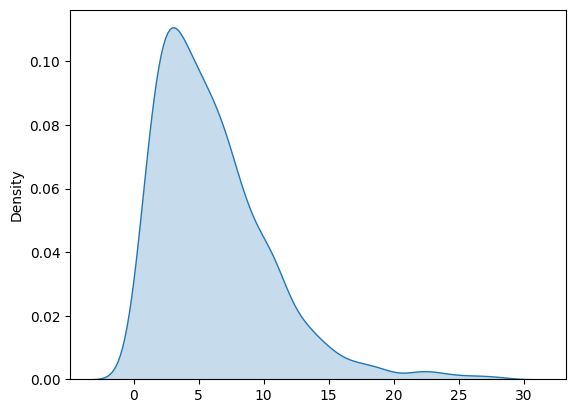

In [3]:
# Print the length of draws
print(len(draws))

# Plot the density of draws
sns.kdeplot(draws, fill=True)
plt.show()

Let's play cards

You have a regular deck of 52 well-shuffled playing cards. The deck consists of 4 suits, and there are 13 cards in each suite: ranks 2 through 10, a jack, a queen, a king, and an ace. This means that in the whole deck of 52, there are four of each distinct rank: four aces, four kings, four tens, four fives, etc.

Since there are 52 distinct cards, the probability of drawing any one particular card is 1/52. Using the two rules of probability, calculate the probabilities of drawing some specific combinations of cards, as described in the instructions.

In [4]:
# Calculate probability of drawing a king or queen
p_king_or_queen = 4/52 + 4/52
print(p_king_or_queen)

0.15384615384615385


In [5]:
# Calculate probability of drawing <= 5
p_five_or_less = (4+4+4+4)/52
print(p_five_or_less)

0.3076923076923077


In [6]:
# Calculate probability of drawing four aces
p_all_four_aces = (4/52)*(3/51)*(2/50)*(1/49)
print(p_all_four_aces)

3.6937852063902484e-06


Bayesian spam filter

 Let's now tackle the famous Bayes' Theorem and use it for a simple but important task: spam detection.

While browsing your inbox, you have figured out that quite a few of the emails you would rather not waste your time on reading contain exclamatory statements, such as "BUY NOW!!!". You start thinking that the presence of three exclamation marks next to each other might be a good spam predictor! Hence you've prepared a DataFrame called emails with two variables: spam, whether the email was spam, and contains_3_exlc, whether it contains the string "!!!". 

Your job is to calculate the probability of the email being spam given that it contains three exclamation marks. Let's tackle it step by step!

In [7]:
data = {
        'spam': [False] * 150 + [True] * 30 + [True] * 20 + [False] * 5,
    'contains_3_excl': [False] * 150 + [True] * 30 + [False] * 20 + [True] * 5
}

# Create the DataFrame
emails = pd.DataFrame(data)

# Shuffle the DataFrame to mix the rows
emails = emails.sample(frac=1).reset_index(drop=True)

emails


,spam,contains_3_excl
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
200,False,False
201,True,True
202,False,False
203,False,False


In [8]:
# Calculate and print the unconditional probability of spam
p_spam = emails["spam"].mean()
print(p_spam)

# Calculate and print the unconditional probability of "!!!"
p_3_excl = emails["contains_3_excl"].mean()
print(p_3_excl)

# Calculate and print the probability of "!!!" given spam
p_3_excl_given_spam = emails.loc[emails["spam"]]["contains_3_excl"].mean()
print(p_3_excl_given_spam)

# Calculate and print the probability of spam given "!!!"
p_spam_given_3_excl = (p_spam * p_3_excl_given_spam) / p_3_excl
print(p_spam_given_3_excl)

0.24390243902439024
0.17073170731707318
0.6
0.857142857142857


What does the test say?

A doctor suspects a disease in their patient, so they run a medical test. The test's manufacturer claims that 99% of sick patients test positive, while the doctor has observed that the test comes back positive in 2% of all cases. The suspected disease is quite rare: only 1 in 1000 people suffer from it.

The test result came back positive. What is the probability that the patient is indeed sick? You can use Bayes' Theorem to answer this question. Here is what you should calculate:

In [9]:
P_sick = 0.1
P_pos_sick = 99
P_pos = 2

P_sick_pos = (P_sick * P_pos_sick) / P_pos 
P_sick_pos 
# Even though the test is great at discovering the disease and raises false alarms rather seldom, a positive result means only a 5% probability that the patient is sick!

4.95

Tossing a coin

Our custom get_heads_prob() function that estimates the probability of success of a binomial distribution. In this exercise, you will use it yourself and verify whether it does its job well in a coin-flipping experiment.

Watch out for the confusion: there are two different probability distributions involved! One is the binomial, which we use to model the coin-flipping. It's a discrete distribution with two possible values (heads or tails) parametrized with the probability of success (tossing heads). The Bayesian estimate of this parameter is another, continuous probability distribution. We don't know what kind of distribution it is, but we can estimate it with get_heads_prob() and visualize it.

In [10]:
def get_heads_prob(tosses, alpha=1, beta=1, samples=1000):
    """
    Estimates the probability distribution of heads in coin tosses 
    using a Bayesian approach with a Beta distribution.

    Parameters:
    tosses (array-like): A binary array where 1 represents heads and 0 represents tails.
    alpha (int): The alpha parameter for the Beta distribution (prior number of heads + 1).
    beta (int): The beta parameter for the Beta distribution (prior number of tails + 1).

    alpha and beta are the prior parameters for the Beta distribution, defaulting to 1. 
    They represent your prior belief about the number of heads and tails before observing the data.

    Returns:
    numpy.ndarray: An array of samples from the posterior Beta distribution.
    """

    # Calculate the number of heads in the tosses
    num_heads = np.sum(tosses)
    
    # Calculate the number of tails in the tosses
    num_tails = len(tosses) - num_heads
    
    # Generate 1000 samples from the Beta distribution
    # The parameters for the Beta distribution are:
    # alpha (prior + observed heads) and beta (prior + observed tails)
    samples = np.random.beta(num_heads + alpha, num_tails + beta, samples)
    
    return samples


In [11]:
# Example usage:
tosses = [1, 0, 1, 1, 0, 0, 1]  # Example coin tosses  (1 = heads, 0 = tails)
samples = get_heads_prob(tosses, alpha=1, beta=1) # alpha=1 and beta=1 if we don't have prior knowledge about the number of heads and tails

print(len(samples))
print(samples[:10])

1000
[0.38066285 0.34577219 0.53121154 0.73696086 0.35910262 0.65110933
 0.60969749 0.37163037 0.49775652 0.82811964]


In [12]:
# Parameters
n_tosses = 1000      # Number of coin tosses
p_heads = 0.5      # Probability of getting heads

# Generate coin tosses with the binomial distribution
tosses = np.random.binomial(1, p_heads, n_tosses)

print(len(tosses))
print("Coin Tosses:", tosses[:10])


1000
Coin Tosses: [1 0 0 1 0 1 0 0 1 1]


In [13]:
# Estimate the heads probability
heads_prob = get_heads_prob(tosses) # alpha=1, beta=1, samples=1000

print(len(heads_prob))
print(heads_prob[:10])

1000
[0.50405292 0.47577296 0.51626837 0.48166693 0.47899575 0.50746617
 0.4924937  0.48484825 0.46539432 0.50756095]


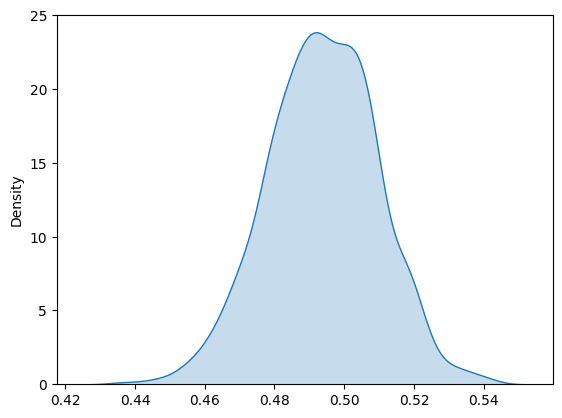

In [14]:
# Plot the distribution of heads probability
sns.kdeplot(heads_prob, fill=True, label="heads probabilty")
plt.show() # The density plot peaks around 50%, indicating that the model has estimated the heads probability well.

The more you toss, the more you learn

Imagine you are a frequentist (just for a day), and you've been tasked with estimating the probability of tossing heads with a (possibly biased) coin, but without observing any tosses. What would you say? It's impossible, there is no data! Then, you are allowed to flip the coin once. You get tails. What do you say now? Well, if that's all your data, you'd say the heads probability is 0%.

You can probably feel deep inside that these answers are not the best ones. But what would be better? What would a Bayesian say?

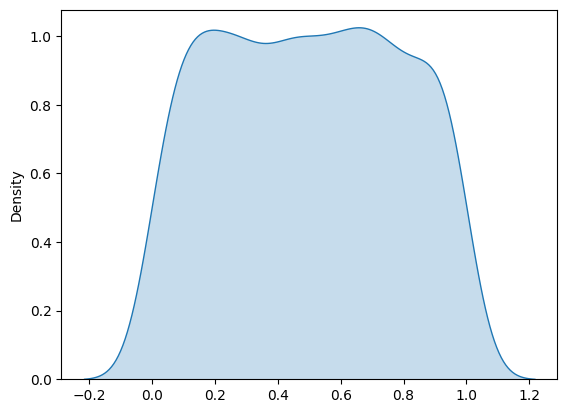

In [15]:
# Estimate and plot heads probability based on no data
heads_prob_nodata = get_heads_prob([])
sns.kdeplot(heads_prob_nodata, fill=True, label="no data")
plt.show()

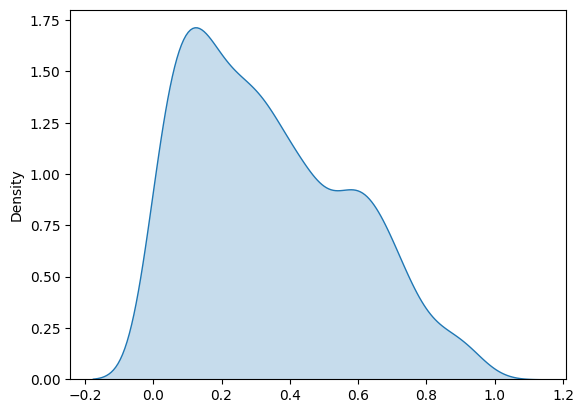

In [16]:
# Estimate and plot heads probability based on a single tails
heads_prob_onetails = get_heads_prob([0])
sns.kdeplot(heads_prob_onetails, fill=True, label="single tails")
plt.show()

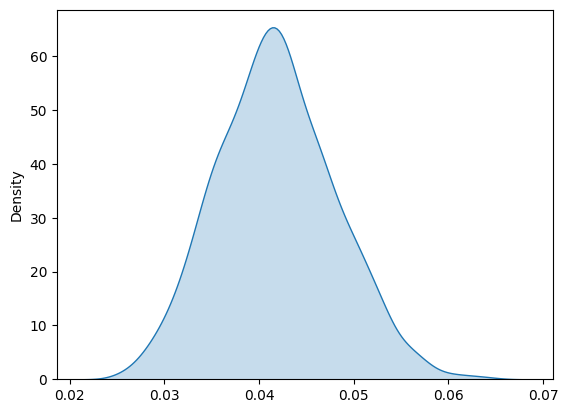

In [17]:
# Estimate and plot heads probability based on 1000 tosses with a biased coin (5% prob of head)
biased_tosses = np.random.binomial(1, 0.05, 1000)

heads_prob_biased = get_heads_prob(biased_tosses)

sns.kdeplot(heads_prob_biased, fill=True, label="biased coin")
plt.show()

With no data, each possible value of the heads probabilty is equally likely! 
That's the Bayesian way of saying 'we don't know'. Having seen a single tails, the model suspects that tails is more likely than heads, but since there is so little data, it is not very sure about it, so other values are possible, too. 
Having seen 1000 tosses, 5% of them heads, the model is certain: the heads probability is around 5%. 
You have just witnessed the Bayesian approach at its core: as more data come in, we update our belief about the parameter, and with more data we become more certain about our estimate!

Hey, is this coin fair?

In the last two exercises, you have examined the get_heads_prob() function to discover how the model estimates the probability of tossing heads and how it updates its estimate as more data comes in.

Now, let's get down to some serious stuff: would you like to play coin flipping against your friend? She is willing to play, as long as you use her special lucky coin. The tosses variable contains a list of 1000 results of tossing her coin. Will you play?

In [18]:
tosses=([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

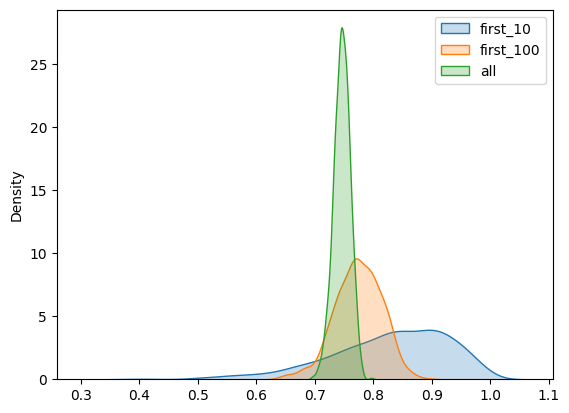

In [19]:
# Assign first 10 and 100 tosses to separate variables
tosses_first_10 = tosses[:10]
tosses_first_100 = tosses[:100]

# Get head probabilities for first 10, first 100, and all tossses
heads_prob_first_10 = get_heads_prob(tosses_first_10)
heads_prob_first_100 = get_heads_prob(tosses_first_100)
heads_prob_all = get_heads_prob(tosses)

# Plot density of head probability for each subset of tosses
sns.kdeplot(heads_prob_first_10, fill=True, label='first_10')
sns.kdeplot(heads_prob_first_100, fill=True, label='first_100')
sns.kdeplot(heads_prob_all, fill=True, label='all')
plt.legend()
plt.show()

You're right refusing to play with this particular coin. The chance it comes up heads is 75% to be precise, and the model got it right - having seen all 1000 tosses, the estimated distribution peaks at 0.75. With smaller data samples, however, the model didn't have the chance to learn the true value. You can see how uncertain it is from the width of the corresponding distributions.

Towards grid approximation

Congratulations! You have just been hired as a data analyst at your government's Department of Health. The cabinet is considering the purchase of a brand-new drug against a deadly and contagious virus. There are some doubts, however, regarding how effective the new drug is against the virus. You have been tasked with estimating the drug's efficacy rate, i.e. the percentage of patients cured by the drug.

An experiment was quickly set up in which 10 sick patients have been treated with the drug. Once you know how many of them are cured, you can use the binomial distribution with a cured patient being a "success" and the efficacy rate being the "probability of success". While you are waiting for the experiment's results, you decide to prepare the parameter grid.

In [20]:
# Create cured patients array from 1 to 10
num_patients_cured = np.arange(0,11)

num_patients_cured

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [21]:
# Create efficacy rate array from 0 to 1 by 0.01
efficacy_rate = np.arange(0,1.01,0.01)

efficacy_rate

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [22]:
# Combine the two arrays in one DataFrame
df = pd.DataFrame([(x, y) for x in num_patients_cured for y in efficacy_rate])

# Name the columns
df.columns = ['num_patients_cured','efficacy_rate']

df 
#You have prepared a fine grid of possible values for the parameter you want to estimate (the efficacy rate), 
# for all possible results of the experiment (the number of patients cured by the drug).

,num_patients_cured,efficacy_rate
0,0,0.00
1,0,0.01
2,0,0.02
3,0,0.03
4,0,0.04
...,...,...
1106,10,0.96
1107,10,0.97
1108,10,0.98
1109,10,0.99


Grid approximation without prior knowledge

According to the experiment's outcomes, out of 10 sick patients treated with the drug, 9 have been cured. What can you say about the drug's efficacy rate based on such a small sample? Assume you have no prior knowledge whatsoever regarding how good the drug is.

In [23]:
# Calculate the prior efficacy rate and the likelihood
df["prior"] = uniform.pdf(df["efficacy_rate"]) 
df["likelihood"] = binom.pmf(df["num_patients_cured"], 10, df["efficacy_rate"]) # likelihood of curing a given number of patients out of 10 trials for each efficacy rate.

df

,num_patients_cured,efficacy_rate,prior,likelihood
0,0,0.00,1.0,1.000000
1,0,0.01,1.0,0.904382
2,0,0.02,1.0,0.817073
3,0,0.03,1.0,0.737424
4,0,0.04,1.0,0.664833
...,...,...,...,...
1106,10,0.96,1.0,0.664833
1107,10,0.97,1.0,0.737424
1108,10,0.98,1.0,0.817073
1109,10,0.99,1.0,0.904382


In [24]:
# Calculate the posterior efficacy rate and scale it to sum up to one
df["posterior_prob"] = df["prior"] * df["likelihood"]
df["posterior_prob"] /= df["posterior_prob"].sum()

print(df["posterior_prob"].sum())
df

0.9999999999999999


,num_patients_cured,efficacy_rate,prior,likelihood,posterior_prob
0,0,0.00,1.0,1.000000,0.009901
1,0,0.01,1.0,0.904382,0.008954
2,0,0.02,1.0,0.817073,0.008090
3,0,0.03,1.0,0.737424,0.007301
4,0,0.04,1.0,0.664833,0.006583
...,...,...,...,...,...
1106,10,0.96,1.0,0.664833,0.006583
1107,10,0.97,1.0,0.737424,0.007301
1108,10,0.98,1.0,0.817073,0.008090
1109,10,0.99,1.0,0.904382,0.008954


<Axes: >

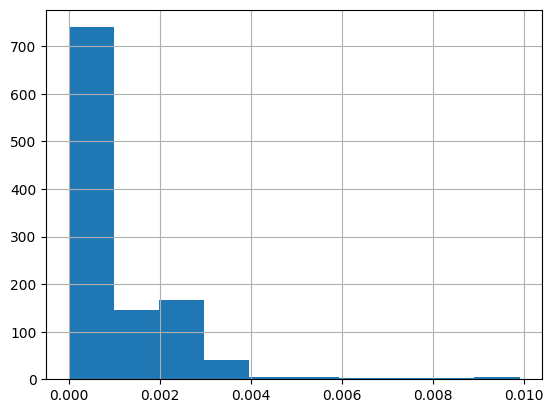

In [25]:
df.posterior_prob.hist()

In [26]:
# Compute the posterior probability of observing 9 cured patients
df_9_of_10_cured = df.loc[df["num_patients_cured"] == 9]
df_9_of_10_cured["posterior_prob"] /= df_9_of_10_cured["posterior_prob"].sum()

print(df_9_of_10_cured["posterior_prob"].sum())
df_9_of_10_cured

1.0


C:\Users\Alienware\AppData\Local\Temp\ipykernel_20688\873981635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_9_of_10_cured["posterior_prob"] /= df_9_of_10_cured["posterior_prob"].sum()


,num_patients_cured,efficacy_rate,prior,likelihood,posterior_prob
909,9,0.00,1.0,0.000000e+00,0.000000e+00
910,9,0.01,1.0,9.900000e-18,1.089999e-18
911,9,0.02,1.0,5.017600e-15,5.524422e-16
912,9,0.03,1.0,1.909251e-13,2.102102e-14
913,9,0.04,1.0,2.516582e-12,2.770780e-13
...,...,...,...,...,...
1005,9,0.96,1.0,2.770136e-01,3.049944e-02
1006,9,0.97,1.0,2.280693e-01,2.511063e-02
1007,9,0.98,1.0,1.667496e-01,1.835927e-02
1008,9,0.99,1.0,9.135172e-02,1.005791e-02


<Axes: >

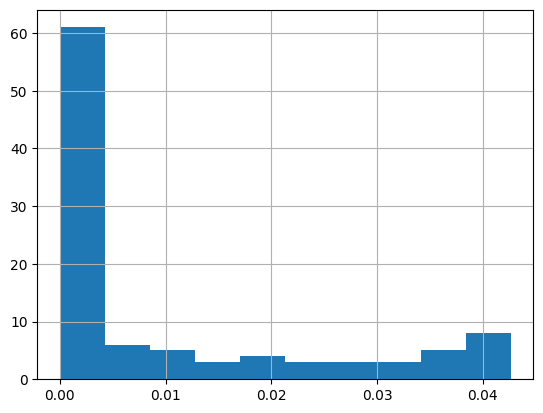

In [27]:
df_9_of_10_cured.posterior_prob.hist()

Text(0.5, 1.0, 'probability of curing 9 patients, at each efficacy rate')

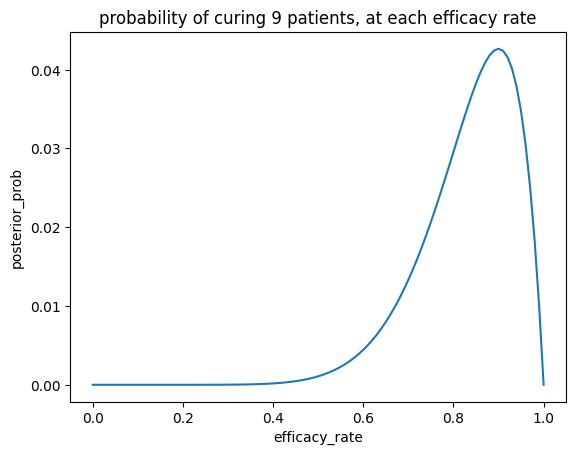

In [28]:
sns.lineplot(x='efficacy_rate', y='posterior_prob', data=df_9_of_10_cured)
plt.title('probability of curing 9 patients, at each efficacy rate')

As we might have expected, observing 9 out of 10 patients cured results in the posterior efficacy rate of 90% being very likely. Notice, however, how much uncertainty there is in the posterior distribution: even the efficacy of 50% is plausible. This is the result of a very small data sample and a great example of how Bayesian parameter estimates incorporate uncertainty!

Updating posterior belief

Well done on estimating the posterior distribution of the efficacy rate in the previous exercise! Unfortunately, due to a small data sample, this distribution is quite wide, indicating much uncertainty regarding the drug's quality. Luckily, testing of the drug continues, and a group of another 12 sick patients have been treated, 10 of whom were cured. We need to update our posterior distribution with these new data!

This is easy to do with the Bayesian approach. We simply need to run the grid approximation similarly as before, but with a different prior. We can use all our knowledge about the efficacy rate (embodied by the posterior distribution from the previous exercise) as a new prior! Then, we recompute the likelihood for the new data, and get the new posterior!

In [29]:
# Assign old posterior to new prior and calculate likelihood
df["new_prior"] = df["posterior_prob"]
df["new_likelihood"] = binom.pmf(df["num_patients_cured"], 12, df["efficacy_rate"])
df

,num_patients_cured,efficacy_rate,prior,likelihood,posterior_prob,new_prior,new_likelihood
0,0,0.00,1.0,1.000000,0.009901,0.009901,1.000000
1,0,0.01,1.0,0.904382,0.008954,0.008954,0.886385
2,0,0.02,1.0,0.817073,0.008090,0.008090,0.784717
3,0,0.03,1.0,0.737424,0.007301,0.007301,0.693842
4,0,0.04,1.0,0.664833,0.006583,0.006583,0.612710
...,...,...,...,...,...,...,...
1106,10,0.96,1.0,0.664833,0.006583,0.006583,0.070206
1107,10,0.97,1.0,0.737424,0.007301,0.007301,0.043803
1108,10,0.98,1.0,0.817073,0.008090,0.008090,0.021571
1109,10,0.99,1.0,0.904382,0.008954,0.008954,0.005969


In [30]:
# Calculate new posterior and scale it
df["new_posterior_prob"] = df["new_prior"] * df["new_likelihood"]
df["new_posterior_prob"] /= df["new_posterior_prob"].sum()
df

,num_patients_cured,efficacy_rate,prior,likelihood,posterior_prob,new_prior,new_likelihood,new_posterior_prob
0,0,0.00,1.0,1.000000,0.009901,0.009901,1.000000,0.050946
1,0,0.01,1.0,0.904382,0.008954,0.008954,0.886385,0.040840
2,0,0.02,1.0,0.817073,0.008090,0.008090,0.784717,0.032665
3,0,0.03,1.0,0.737424,0.007301,0.007301,0.693842,0.026067
4,0,0.04,1.0,0.664833,0.006583,0.006583,0.612710,0.020753
...,...,...,...,...,...,...,...,...
1106,10,0.96,1.0,0.664833,0.006583,0.006583,0.070206,0.002378
1107,10,0.97,1.0,0.737424,0.007301,0.007301,0.043803,0.001646
1108,10,0.98,1.0,0.817073,0.008090,0.008090,0.021571,0.000898
1109,10,0.99,1.0,0.904382,0.008954,0.008954,0.005969,0.000275


In [31]:
# Compute the posterior probability of observing 10 cured patients
df_10_of_12_cured = df.loc[df["num_patients_cured"] == 10]
df_10_of_12_cured["new_posterior_prob"] /= df_10_of_12_cured["new_posterior_prob"].sum()
df_10_of_12_cured

C:\Users\Alienware\AppData\Local\Temp\ipykernel_20688\4195989229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10_of_12_cured["new_posterior_prob"] /= df_10_of_12_cured["new_posterior_prob"].sum()


,num_patients_cured,efficacy_rate,prior,likelihood,posterior_prob,new_prior,new_likelihood,new_posterior_prob
1010,10,0.00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1011,10,0.01,1.0,1.000000e-20,9.900990e-23,9.900990e-23,6.468660e-19,5.207317e-39
1012,10,0.02,1.0,1.024000e-17,1.013861e-19,1.013861e-19,6.490767e-16,5.350517e-33
1013,10,0.03,1.0,5.904900e-16,5.846436e-18,5.846436e-18,3.666907e-14,1.743060e-29
1014,10,0.04,1.0,1.048576e-14,1.038194e-16,1.038194e-16,6.378026e-13,5.383763e-27
...,...,...,...,...,...,...,...,...
1106,10,0.96,1.0,6.648326e-01,6.582501e-03,6.582501e-03,7.020633e-02,3.757407e-02
1107,10,0.97,1.0,7.374241e-01,7.301229e-03,7.301229e-03,4.380299e-02,2.600284e-02
1108,10,0.98,1.0,8.170728e-01,8.089830e-03,8.089830e-03,2.157072e-02,1.418813e-02
1109,10,0.99,1.0,9.043821e-01,8.954278e-03,8.954278e-03,5.968922e-03,4.345578e-03


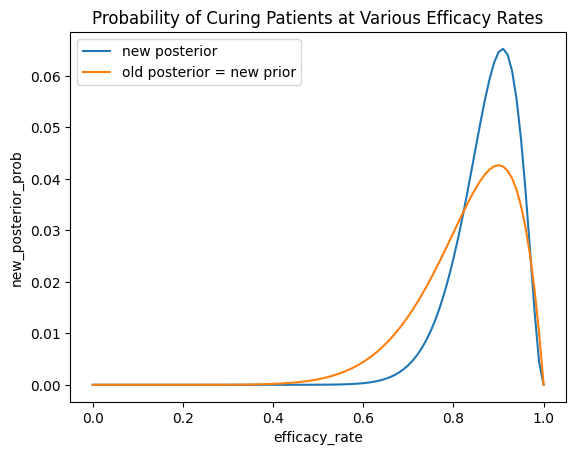

In [32]:
# Plotting the new posterior
sns.lineplot(x=df_10_of_12_cured["efficacy_rate"], 
             y=df_10_of_12_cured["new_posterior_prob"], 
             label="new posterior")

# Plotting the old posterior = new prior
sns.lineplot(x=df_9_of_10_cured["efficacy_rate"], 
             y=df_9_of_10_cured["posterior_prob"], 
             label="old posterior = new prior")

# Adding the title
plt.title('Probability of Curing Patients at Various Efficacy Rates')

# Showing the plot
plt.show()


The new posterior is higher and narrower than the old one, which means there is less uncertainty in the estimation.

The knowledge about the first 10 patients is already encoded in the old posterior, which became the new prior.

Adding the data on the new 12 patients increase our estimate of the drug's effectiveness against the virus.

Instead of using the old posterior as a new prior, we could have come up with our own prior belief about the efficacy rate in the first place.

Simulating posterior draws

You have just decided to use a Beta(5, 2) prior for the efficacy rate. You are also using the binomial distribution to model the data (curing a sick patient is a "success", remember?). Since the beta distribution is a conjugate prior for the binomial likelihood, you can simply simulate the posterior!

You know that if the prior is 
Beta(a,b)

, then the posterior is 
Beta(x,y)
, with:

x = number of successes + a
,

y = number of observations - number of successes + b
.

Can you simulate the posterior distribution? Recall that altogether you have data on 22 patients, 19 of whom have been cured.

<Axes: ylabel='Density'>

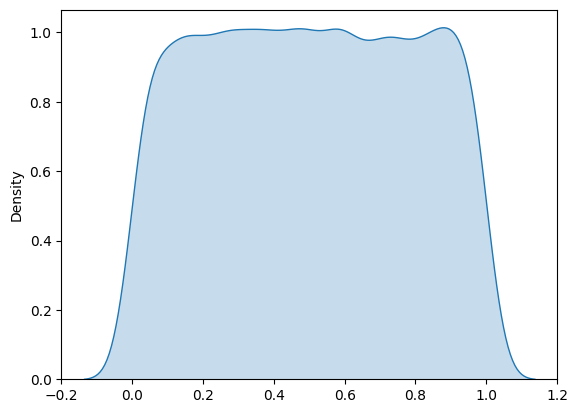

In [33]:
sns.kdeplot(np.random.beta(1,1,10000), fill=True) # beta distribution with equal probability for each outcome (0 successes and 0 failures reported before)

# To represent each value within the interval [0, 1] equally likely, the pdf must have the value 1 everywehere 
# because its area under the curve must integrates to 1 over the range [0, 1].

<Axes: ylabel='Density'>

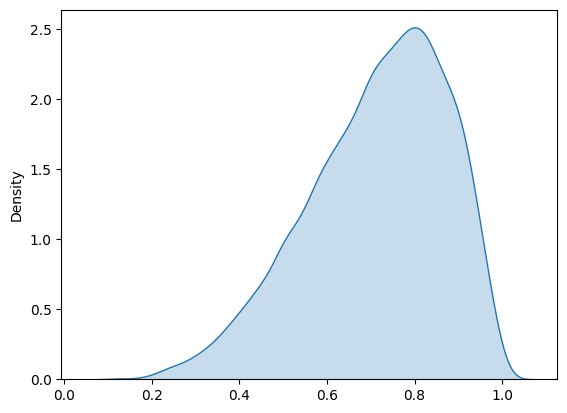

In [34]:
sns.kdeplot(np.random.beta(5,2,10000), fill=True) 
# If you set 𝛼=5 and 𝛽=2, it suggests that before observing any new data, you believe there have been 4 successes (5 - 1) and 1 failure (2 - 1) in previous similar situations.
# e.g. to use if the reported efficacy rates are mostly between 70% and 90%, while a couple of results below 50% were recorded too, but not many.

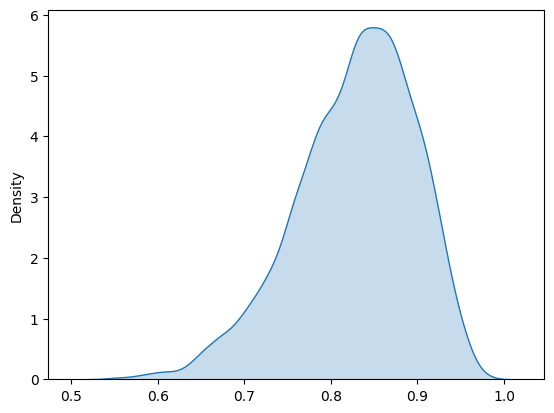

In [35]:
# Define the number of patients treated and cured
num_patients_treated = 22
num_patients_cured = 19

# Simulate 10000 draws from the posterior distribuition
posterior_draws = np.random.beta(19 + 5, 22 - 19 + 2, 10000)

# Plot the posterior distribution
sns.kdeplot(posterior_draws, fill=True)
plt.show()

Notice that the posterior distribuion has a slightly longer tail on the left-hand side, allowing for efficacy rates as small as 50%, even though in your data you observe 86% (19 out of 22). This is the impact of the prior: you learn not only from your own small data, but also from other countries' experience!

Point estimates

You continue working at your government's Department of Health. You have been tasked with filling the following memo with numbers, before it is sent to the secretary.

Based on the experiments carried out by ourselves and neighboring countries, should we distribute the drug, we can expect ___ infected people to be cured. There is a 50% probability the number of cured infections will amount to at least ___, and with 90% probability it will not be less than ___.

In [36]:
# Calculate the expected number of people cured
cured_expected = np.mean(posterior_draws) * len(posterior_draws)
cured_expected

8273.346161418573

In [37]:
# Calculate the minimum number of people cured with 50% probability
min_cured_50_perc = np.median(posterior_draws) * len(posterior_draws)
min_cured_50_perc

8351.021955253686

In [38]:
# Calculate the minimum number of people cured with 90% probability
min_cured_90_perc = np.percentile(posterior_draws, 10) * len(posterior_draws)
min_cured_90_perc

7332.277638430601

In [39]:
# Print the filled-in memo
print(f"Based on the experiments carried out by ourselves and neighboring countries, \nshould we distribute the drug, we can expect {int(cured_expected)} infected people to be cured. \nThere is a 50% probability the number of cured infections \nwill amount to at least {int(min_cured_50_perc)}, and with 90% probability \nit will not be less than {int(min_cured_90_perc)}.")

Based on the experiments carried out by ourselves and neighboring countries, 
should we distribute the drug, we can expect 8273 infected people to be cured. 
There is a 50% probability the number of cured infections 
will amount to at least 8351, and with 90% probability 
it will not be less than 7332.


However, these numbers convey no information as to how uncertain the estimation is. Let's try quantifying this uncertainty next!

Highest Posterior Density credible intervals

You know that reporting bare point estimates is not enough. It would be great to provide a measure of uncertainty in the drug's efficacy rate estimate, and you have all the means to do so. You decide to add the following to the memo.

The experimental results indicate that with a 90% probability the new drug's efficacy rate is between ___ and ___, and with a 95% probability it is between ___ and ___.

You will need to calculate two credible intervals: one of 90% and another of 95% probability.

In [40]:
# Calculate HPD credible interval of 90%
ci_90 = az.hdi(posterior_draws, hdi_prob=0.90)
ci_90

array([0.7179287 , 0.93857705])

In [41]:
# Calculate HPD credible interval of 95%
ci_95 = az.hdi(posterior_draws, hdi_prob=0.95)
ci_95

array([0.69359572, 0.95573708])

In [42]:

# Print the memo
print(f"The experimental results indicate that with a 90% probability \nthe new drug's efficacy rate is between {np.round(ci_90[0], 2)} and {np.round(ci_90[1], 2)}, \nand with a 95% probability it is between {np.round(ci_95[0], 2)} and {np.round(ci_95[1], 2)}.")

The experimental results indicate that with a 90% probability 
the new drug's efficacy rate is between 0.72 and 0.94, 
and with a 95% probability it is between 0.69 and 0.96.


That's the Bayesian interpretation of a credible interval. Since the drug's true efficacy rate is considered a random variable, we can make probabilistic statements about it, as in: "the probability that it takes a particular value or that it lies in a particular interval is X%".

Simulate beta posterior

In the upcoming few exercises, you will be using the simulate_beta_posterior() function (same as the function get_heads_prob above). In this exercise, you will get a feel for what the function is doing by carrying out the computations it performs.

You are given a list of ten coin tosses, called tosses, in which 1 stands for heads, 0 for tails, and we define heads as a "success". To simulate the posterior probability of tossing heads, you will use a beta prior. Recall that if the prior is 
beta(a,b), then the posterior is beta(x,y)

In [43]:
def simulate_beta_posterior(simulations, alpha=1, beta=1, samples=1000):

    num_successes = np.sum(simulations)
    num_failures = len(simulations) - num_successes
    
    samples = np.random.beta(num_successes + alpha, num_failures + beta, samples)
    
    return samples

In [44]:
tosses = [1, 0, 0, 1, 0, 1, 1, 1, 0, 1]

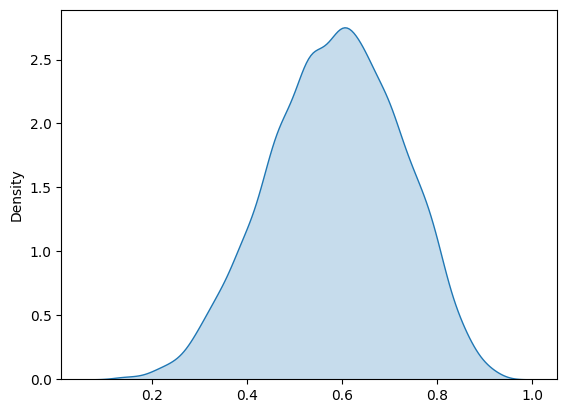

In [45]:
# Set prior parameters and calculate number of successes
beta_prior_a = 1
beta_prior_b = 1
num_successes = np.sum(tosses)

# Generate 10000 posterior draws
posterior_draws = np.random.beta(
  num_successes + beta_prior_a, 
  len(tosses) - num_successes + beta_prior_b, 
  10000)  

# Plot density of posterior_draws
sns.kdeplot(posterior_draws, fill=True)
plt.show()

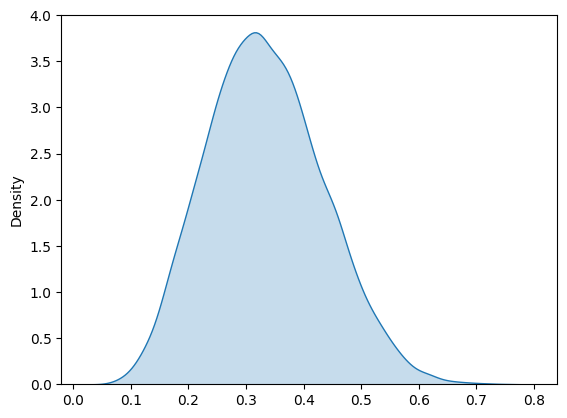

In [46]:
# Set prior parameters and calculate number of successes
beta_prior_a = 1
beta_prior_b = 10
num_successes = np.sum(tosses)

# Generate 10000 posterior draws
posterior_draws = np.random.beta(
  num_successes + beta_prior_a, 
  len(tosses) - num_successes + beta_prior_b,  
  10000)  

# Plot density of posterior_draws
sns.kdeplot(posterior_draws, fill=True)
plt.show()

# Based on the binomial data and the prior, it samples posterior draws. Notice how using the Beta(1, 10) prior shifts the posterior to the left compared to Beta(1, 1). 
# This effect is quite strong, as there is little data: just 10 coin flips. 

Posterior click rates

After a successful career episode at the Department for Health, you switch to marketing. Your new company has just run two pilot advertising campaigns: one for sneakers, and one for clothes. Your job is to find out which one was more effective as measured by the click-through rate and should be rolled out to a larger audience.

You decide to run A/B testing, modeling the data using the binomial likelihood. You found out that a typical click-through rate for the previous ads has been around 15% recently, with results varying between 5% and 30%. Based on this, you conclude that beta (10,50) would be a good prior for the click-through rate.

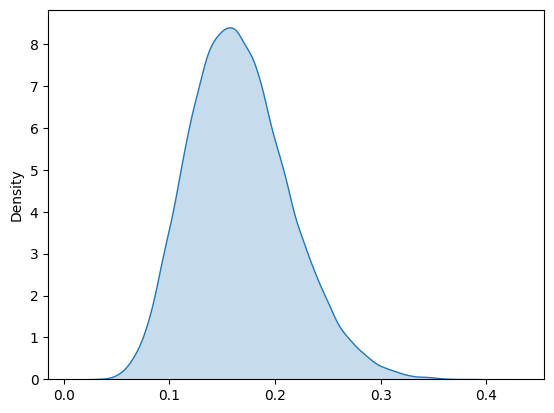

In [47]:
# Generate prior draws
prior_draws = np.random.beta(10, 50, 100000)

# Plot the prior
sns.kdeplot(prior_draws, fill=True, label="prior")
plt.show()

In [48]:
ads = pd.read_csv('ads.csv')
ads

,user_id,product,site_version,time,banner_clicked
0,f500b9f27ac611426935de6f7a52b71f,clothes,desktop,2019-01-28 16:47:08,0
1,cb4347c030a063c63a555a354984562f,sneakers,mobile,2019-03-31 17:34:59,0
2,89cec38a654319548af585f4c1c76b51,clothes,mobile,2019-02-06 09:22:50,0
3,1d4ea406d45686bdbb49476576a1a985,sneakers,mobile,2019-05-23 08:07:07,0
4,d14b9468a1f9a405fa801a64920367fe,clothes,mobile,2019-01-28 08:16:37,0
...,...,...,...,...,...
9995,7ca28ccde263a675d7ab7060e9ed0eca,clothes,mobile,2019-02-02 08:19:39,0
9996,7e2ec2631332c6c4527a1b78c7ede789,clothes,mobile,2019-04-04 03:27:05,0
9997,3b828da744e5785f1e67b5df3fda5571,clothes,mobile,2019-04-15 15:59:06,0
9998,6cce0527245bcc8519d698af2224c04a,clothes,mobile,2019-05-21 20:43:21,0


In [49]:
# Extract the banner_clicked column for each product
clothes_clicked = ads.loc[ads["product"] == "clothes"]["banner_clicked"]
clothes_clicked

0       0
2       0
4       0
5       0
7       0
       ..
9994    0
9995    0
9996    0
9997    0
9998    0
Name: banner_clicked, Length: 5028, dtype: int64

In [50]:
sneakers_clicked = ads.loc[ads["product"] == "sneakers"]["banner_clicked"]
sneakers_clicked

1       0
3       0
6       0
8       0
13      1
       ..
9985    0
9987    0
9988    0
9990    1
9999    0
Name: banner_clicked, Length: 4972, dtype: int64

In [51]:
# Simulate posterior draws for each product
clothes_posterior = simulate_beta_posterior(clothes_clicked, 10, 50)
print(len(clothes_posterior))
clothes_posterior[:10]

1000


array([0.12934151, 0.1358893 , 0.13266435, 0.12745821, 0.12595119,
       0.1281274 , 0.13021176, 0.13201813, 0.12789945, 0.13500699])

In [52]:
sneakers_posterior = simulate_beta_posterior(sneakers_clicked, 10, 50)
print(len(sneakers_posterior))
sneakers_posterior[:10]

1000


array([0.1191651 , 0.10942764, 0.12684993, 0.11545301, 0.11616336,
       0.11410813, 0.11730527, 0.11317125, 0.11354437, 0.11781983])

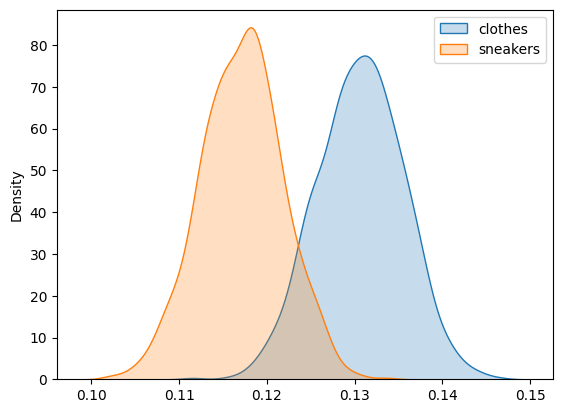

In [53]:
sns.kdeplot(clothes_posterior, fill=True, label="clothes")
sns.kdeplot(sneakers_posterior, fill=True, label="sneakers")
plt.legend()
plt.show()

A or B, and how sure are we?

You have just discovered that clothes ads are likely to have a higher click ratio than sneakers ads. But what is the exact probability that this is the case? To find out, you will have to calculate the posterior difference between clothes and sneakers click rates. Then, you will calculate a credible interval for the difference to measure the uncertainty in the estimate. Finally, you will calculate the percentage of cases where this difference is positive, which corresponds to clothes click rate being higher.

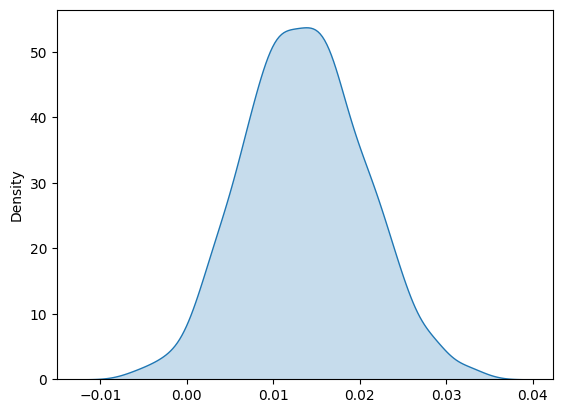

In [54]:
# Calculate posterior difference and plot it
diff = clothes_posterior - sneakers_posterior
sns.kdeplot(diff, fill=True, label="diff")
plt.show()

In [55]:
# Calculate and print 90% credible interval of posterior difference
interval = az.hdi(diff, hdi_prob=0.9)
print(interval)

[0.00228075 0.02458631]


In [56]:
# Calculate and print probability of clothes ad being better
clothes_better_prob = (diff > 0).mean()
print(clothes_better_prob)

0.982


Take a look at the posterior density plot of the difference in click rates: it is very likely positive, indicating that clothes are likely better. The credible interaval indicates that with 90% probability, the clothes ads click rate is up to 2.4 percentage points higher than the one for sneakers. Finally, the probability that the clothes click rate is higher is 98%. Great! But there is a 2% chance that actually sneakers ads are better! How great is that risk?

How bad can it be?

You have concluded that with 98% probability, clothes ads have a higher click-through ratio than sneakers ads. This suggests rolling out the clothes campaign to a larger audience. However, there is a 2% risk that it's the sneakers ads that are actually better. If that's the case, how many clicks do we lose if we roll out the clothes campaign?

The answer to this is the expected loss: the average posterior difference between the two click-through ratios given that sneakers ads do better. To calculate it, you only need to take the entries in the posterior difference where the sneakers click-through rate is higher and compute their average.

In [57]:
# Slice diff to take only cases where it is negative
loss = diff[diff < 0]

# Compute and print expected loss
expected_loss = np.mean(loss)
print(expected_loss)

-0.0030780608052935676


You can sefely roll out the clothes campaign to a larger audience. You are 98% sure it has a higher click rare, and even if the 2% risk of this being a wrong decision materializes, you will only lose 0.2 percentage points in the click rate, which is a very small risk!

Decision analysis: cost

Your journey in marketing continues. You have already calculated the posterior click rates for clothes and sneakers ads, available in your workspace as clothes_posterior and sneakers_posteriors, respectively. Your boss, however, is not interested in the distributions of click rates. They would like to know what would be the cost of rolling out an ad campaign to 10'000 users. The company's advertising partner charges dollars 2.5 per click on a mobile device and $2 on a desktop device. Your boss is interested in the cost of the campaign for each product (clothes and sneakers) on each platform (mobile and desktop): four quantities in total.

Let's compare these four posterior costs using the forest plot from pymc3

In [58]:
# Calculate distributions of the numbers of clicks for clothes and sneakers
clothes_num_clicks = clothes_posterior * 10000
sneakers_num_clicks = sneakers_posterior * 10000

clothes_num_clicks.shape, sneakers_num_clicks.shape

((1000,), (1000,))

In [59]:
ads

,user_id,product,site_version,time,banner_clicked
0,f500b9f27ac611426935de6f7a52b71f,clothes,desktop,2019-01-28 16:47:08,0
1,cb4347c030a063c63a555a354984562f,sneakers,mobile,2019-03-31 17:34:59,0
2,89cec38a654319548af585f4c1c76b51,clothes,mobile,2019-02-06 09:22:50,0
3,1d4ea406d45686bdbb49476576a1a985,sneakers,mobile,2019-05-23 08:07:07,0
4,d14b9468a1f9a405fa801a64920367fe,clothes,mobile,2019-01-28 08:16:37,0
...,...,...,...,...,...
9995,7ca28ccde263a675d7ab7060e9ed0eca,clothes,mobile,2019-02-02 08:19:39,0
9996,7e2ec2631332c6c4527a1b78c7ede789,clothes,mobile,2019-04-04 03:27:05,0
9997,3b828da744e5785f1e67b5df3fda5571,clothes,mobile,2019-04-15 15:59:06,0
9998,6cce0527245bcc8519d698af2224c04a,clothes,mobile,2019-05-21 20:43:21,0


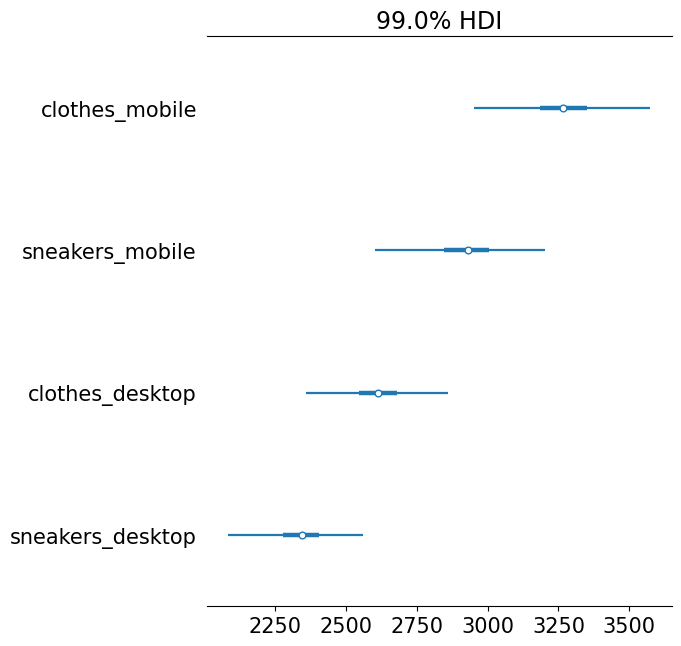

In [60]:
# Calculate cost distributions for each product and platform
ads_costs = {
    "clothes_mobile": clothes_num_clicks * 2.5,
    "sneakers_mobile": sneakers_num_clicks * 2.5,
    "clothes_desktop": clothes_num_clicks * 2,
    "sneakers_desktop": sneakers_num_clicks * 2,
}

# Draw a forest plot of ads_costs
pm.plot_forest(ads_costs, hdi_prob=0.99, textsize=15)
plt.show()

Decision analysis: profit

In the meantime, a new company policy has been released. From now on, the goal of the marketing department is not to minimize the costs of campaigns, which was quite ineffective, but rather to maximize the profit. Can you adjust your findings accordingly, knowing that the expected revenue per click from a mobile ad is 3.4 dollars, and the one from a desktop ad is $3? To calculate the profit, you need to calculate the revenue from all clicks, then subtract the corresponding cost from it.

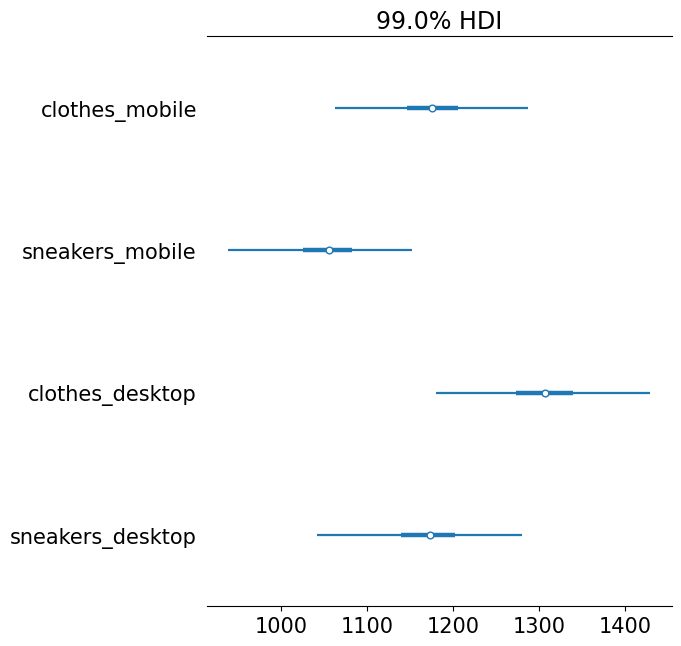

In [61]:
# Calculate profit distributions for each product and platform
ads_profit = {
    "clothes_mobile": clothes_num_clicks * (3.4 - 2.5),
    "sneakers_mobile": sneakers_num_clicks * (3.4 - 2.5),
    "clothes_desktop": clothes_num_clicks * (3 - 2),
    "sneakers_desktop": sneakers_num_clicks * (3 - 2),
}

# Draw a forest plot of ads_profit
pm.plot_forest(ads_profit, hdi_prob=0.99, textsize=15)
plt.show()

Notice how shifting focus from costs to profit has changed the optimal decision. The sneakers-desktop campaign which minimizes the cost is not the best choice when you care about the profit. Based on these results, you would be more likely to invest in the clothes-desktop campaign, wouldn't you?

Analyzing regression parameters

Your linear regression model has four parameters: the intercept, the impact of clothes ads, the impact of sneakers ads, and the variance. The draws from their respective posterior distributions have been sampled for you and are available as intercept_draws, clothes_draws, sneakers_draws, and sd_draws, respectively.

Before you make predictions with your model, it's a good practice to analyze the posterior draws visually. In this exercise, you will first take a look at the descriptive statistics for each parameter's draws, and then you will visualize the posterior distribution for one of them as an example.

In [62]:
intercept_draws = np.random.normal(0, 0.001, 2000) # 2000 samples from a normal distribution with mean 0 and std 0.001, 
intercept_draws

array([ 0.00163106, -0.00034057, -0.00157901, ...,  0.00030208,
        0.00027458, -0.00090836])

In [63]:
clothes_draws = np.random.normal(0.1, 0.3, 2000) # 2000 samples from a normal distribution with mean 0.1 and std 0.3
clothes_draws

array([-0.01303976,  0.44777209, -0.12655059, ...,  0.25455722,
        0.30436893,  0.47792929])

In [64]:
sneakers_draws = np.random.normal(0.2, 0.2, 2000) # 2000 samples from a normal distribution with mean 0.2 and std 0.2
sneakers_draws

array([ 0.7588487 ,  0.34026154, -0.11865792, ...,  0.27585301,
        0.20941729,  0.31967953])

In [65]:
sd_draws = np.random.uniform(1, 4, 2000) # 2000 samples from a uniform distribution with values between 1 and 4
sd_draws

array([1.6978226 , 1.7900155 , 3.28221604, ..., 1.57289573, 3.0529456 ,
       3.53813366])

In [66]:
# Collect parameter draws in a DataFrame
posterior_draws_df = pd.DataFrame({
    "intercept_draws": intercept_draws,
    "clothes_draws": clothes_draws,
  	"sneakers_draws": sneakers_draws,
    "sd_draws": sd_draws,
})

posterior_draws_df

,intercept_draws,clothes_draws,sneakers_draws,sd_draws
0,0.001631,-0.013040,0.758849,1.697823
1,-0.000341,0.447772,0.340262,1.790016
2,-0.001579,-0.126551,-0.118658,3.282216
3,-0.001356,0.352549,0.360651,2.526910
4,0.000222,0.401405,0.366839,2.876670
...,...,...,...,...
1995,-0.002313,0.012065,0.094409,3.813532
1996,0.000590,0.518291,-0.184135,3.360407
1997,0.000302,0.254557,0.275853,1.572896
1998,0.000275,0.304369,0.209417,3.052946


In [67]:
# Describe parameter posteriors
draws_stats = posterior_draws_df.describe()
print(draws_stats)

       intercept_draws  clothes_draws  sneakers_draws     sd_draws
count      2000.000000    2000.000000     2000.000000  2000.000000
mean         -0.000014       0.110583        0.200882     2.516023
std           0.000988       0.294250        0.199420     0.873196
min          -0.003475      -0.767365       -0.375462     1.000268
25%          -0.000691      -0.083922        0.067928     1.753981
50%          -0.000021       0.110271        0.199755     2.533075
75%           0.000648       0.319408        0.338932     3.299678
max           0.003647       1.101605        1.098062     3.999043


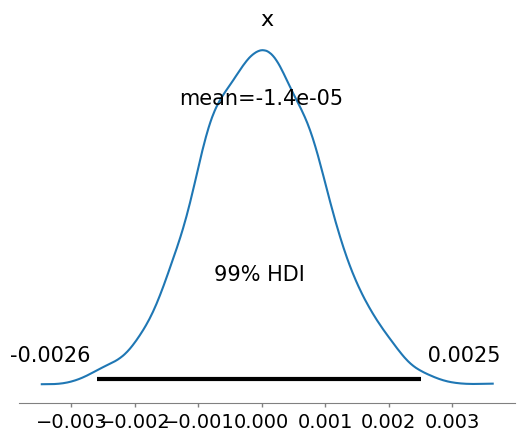

In [68]:
# Plot intercept parameter posterior
pm.plot_posterior(intercept_draws, hdi_prob=0.99)
plt.show()

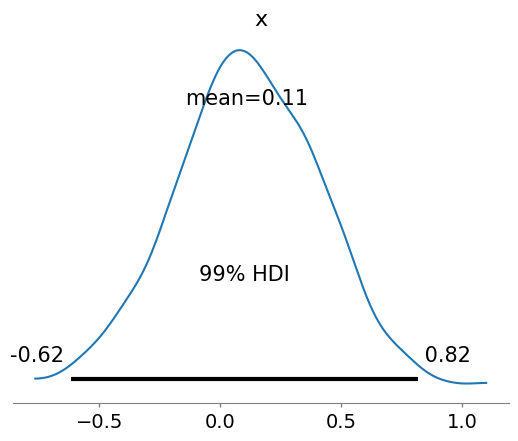

In [69]:
# Plot clothes parameter posterior
pm.plot_posterior(clothes_draws, hdi_prob=0.99)
plt.show() # the mean 0.1 is indicating 1 additional click from 10 ad impressions

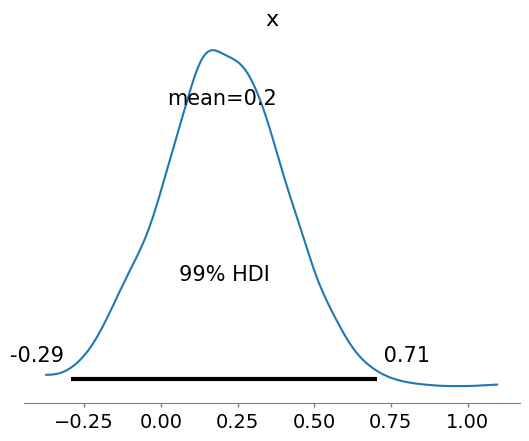

In [70]:
# Plot sneakers parameter posterior
pm.plot_posterior(sneakers_draws, hdi_prob=0.99)
plt.show() # the mean 0.2 is indicating 2 additional click from 10 ad impressions

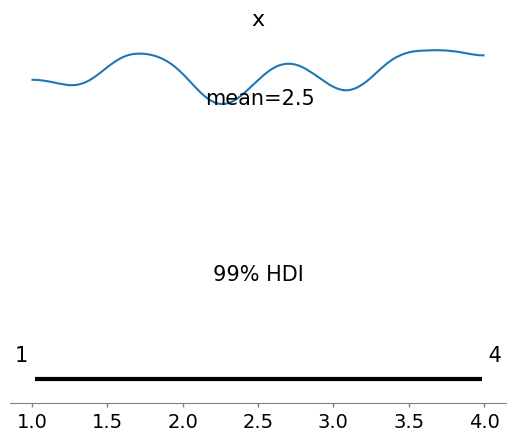

In [71]:
# Plot standard deviation parameter posterior
pm.plot_posterior(sd_draws, hdi_prob=0.99)
plt.show()

Predictive distribution

Good job analyzing the parameter draws! Let's now use the linear regression model to make predictions. How many clicks can we expect if we decide to show 10 clothes ads and 10 sneaker ads? To find out, you will have to draw from the predictive distribution: a normal distribution with the mean defined by the linear regression formula and standard deviation estimated by the model.

First, you will summarize each parameter's posterior with its mean. 

Then, you will calculate the mean of the predictive distribution according to the regression equation. 

Next, you will draw a sample from the predictive distribution 

Finally, you will plot its density. 
    
Here is the regression formula for your convenience:

num_clicks = Normal(beta0 + beta1 * cloths_ads_shown + beta2 * sneakers_ads_shown, std)

In [72]:
# Aggregate posteriors of the parameters to point estimates
intercept_coef = np.mean(intercept_draws)
sneakers_coef = np.mean(sneakers_draws)
clothes_coef = np.mean(clothes_draws)
sd_coef = np.mean(sd_draws)

In [73]:
# Calculate the mean of the predictive distribution
pred_mean = intercept_coef + sneakers_coef*10 + clothes_coef*10
pred_mean

3.1146362103893854

In [74]:
# Sample 1000 draws from the predictive distribution
pred_draws = np.random.normal(pred_mean, sd_coef, size=1000)
pred_draws.shape

(1000,)

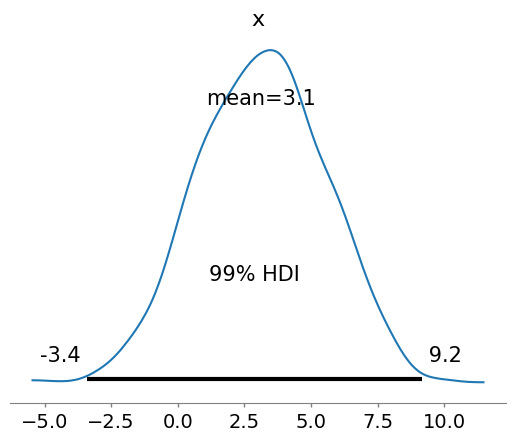

In [75]:
# Plot the density of the predictive distribution
pm.plot_posterior(pred_draws, hdi_prob=0.99)
plt.show() # It looks like you can expect more or less three clicks if you show 10 clothes and 10 sneaker ads.

Markov Chain Monte Carlo

Markov Chain Monte Carlo, or MCMC, combines the concepts of Monte Carlo sampling with Markov Chains' property of converging to a steady state. This allows sampling draws from any, even unknown, posterior distribution.

Sampling posterior draws

Tired of working for the central government and for the marketing company, you take a new job as a data analyst for your city's local authorities. The city operates a bike-sharing system in the city and they ask you to predict the number of bikes rented per day to plan staff and repairs accordingly.

You have been given some data on the number of rented vehicles per day, temperature, humidity, wind speed, and whether the day was a working day:

Try building a regression model to predict num_bikes using the bikes DataFrame and pymc3 (aliased as pm).

In [76]:
bikes = pd.read_csv('bikes_test.csv')
bikes

,work_day,temp,humidity,wind_speed,num_bikes
0,0,0.265833,0.687917,0.175996,2.947
1,1,0.282609,0.622174,0.153800,3.784
2,1,0.354167,0.496250,0.147379,4.375
3,1,0.256667,0.722917,0.133721,2.802
4,1,0.265000,0.562083,0.194037,3.830
5,1,0.280833,0.540000,0.116929,3.831
6,0,0.224167,0.731250,0.289796,2.169
7,0,0.127500,0.464583,0.409212,1.529
8,1,0.222500,0.411250,0.167283,3.422
9,1,0.319167,0.508750,0.141179,3.922


In [77]:
bikes.describe()

,work_day,temp,humidity,wind_speed,num_bikes
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.700000,0.259844,0.574717,0.192933,3.261100
std,0.483046,0.061128,0.111682,0.089860,0.889918
min,0.000000,0.127500,0.411250,0.116929,1.529000
25%,0.250000,0.232292,0.499375,0.142729,2.838250
50%,1.000000,0.265416,0.551041,0.160542,3.603000
75%,1.000000,0.282165,0.671481,0.189527,3.830750
max,1.000000,0.354167,0.731250,0.409212,4.375000


In [78]:
# In just a couple of lines of code you can sample posterior draws in a Bayesian linear regression model!

# Define the formula for the Bayesian model
formula = "num_bikes ~ temp + work_day"

# Create a Bambi model context
model_1 = bmb.Model(formula, bikes)

# Fit the model using the specified formula and dataset 'bikes'
# 'tune' specifies the number of tuning steps.
# 'draws' specifies the number of samples to draw.
trace_1 = model_1.fit(tune=500, draws=1000, idata_kwargs={'log_likelihood': True})

# Tuning steps are used to adjust the parameters of the sampling algorithm before the actual sampling begins.
# This process helps ensure that the sampler explores the posterior distribution effectively and efficiently.

# Return the trace
trace_1

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, temp, work_day]


C:\Users\Alienware\AppData\Roaming\Python\Python310\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 20 seconds.


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

Inspecting posterior draws

You continue working on your task to predict the number of bikes rented per day in a bike-sharing system. The posterior draws from your regression model which you sampled before are available in your workspace as trace_1.

You know that after obtaining the posteriors, it is best practice to take a look at them to see if they make sense and if the MCMC process has converged successfully. In this exercise, you will create two plots visualizing posterior draws and summarize them in a table.

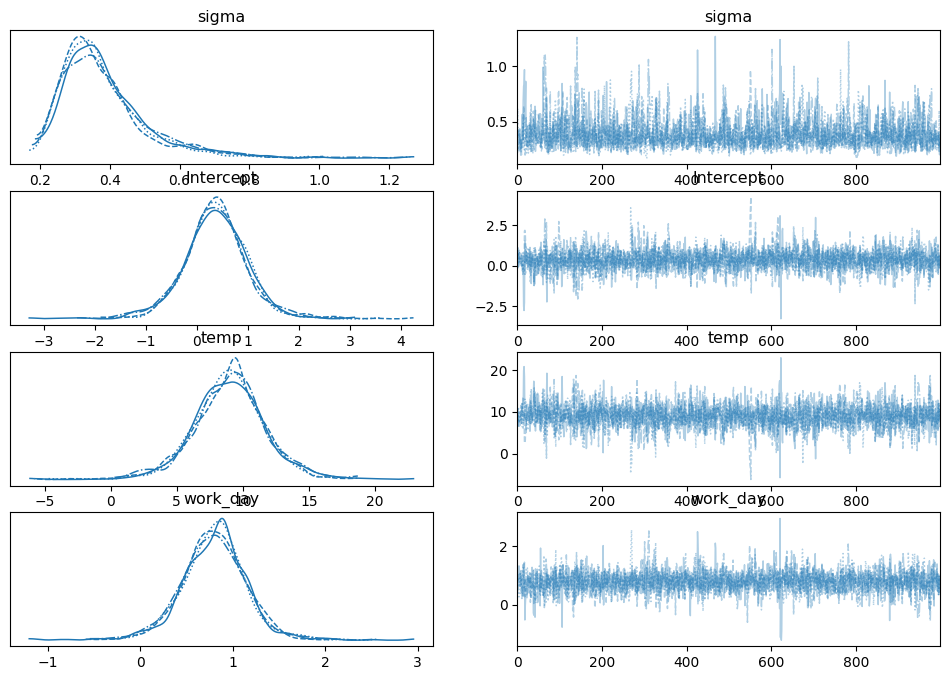

In [79]:
# Draw a trace plot of trace_1
pm.plot_trace(trace_1)
plt.show()

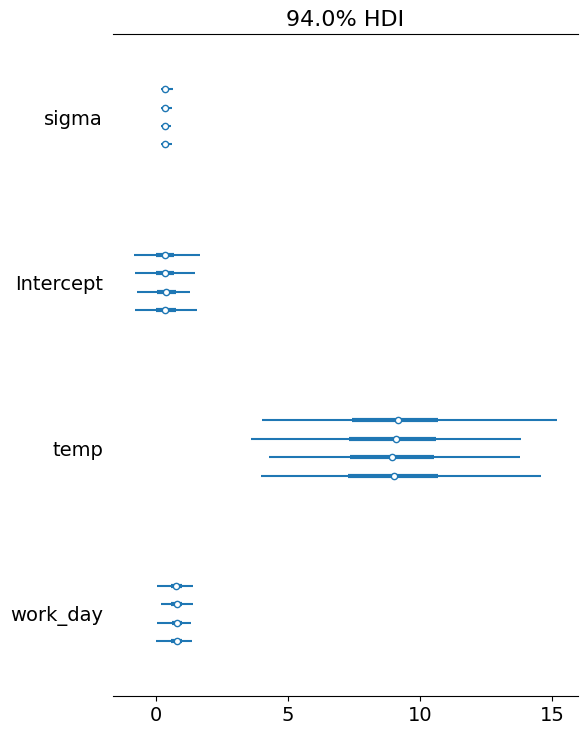

In [80]:
# Draw a forest plot of trace_1
pm.plot_forest(trace_1)
plt.show()

The plot shows a comparison of models based on the 94.0% Highest Density Interval (HDI) for four parameters: sigma, Intercept, temp, and work_day. Here’s how to interpret each component:

Model Parameters:

Sigma: Represents the variability in the model. Lower sigma values indicate less variability and more precise estimates.

Intercept: The baseline value of the dependent variable when all predictors are zero.

Temp: The effect of temperature on the number of bikes.

Work_day: The effect of whether it’s a working day on the number of bikes.

The lower end of the 94% interaval of "work_day" is below zero, and the upper end is postive. 
Hence, with 94% confidence, we cannot say whether the impact of work_day is positive or negative!

In [81]:
pm.summary(trace_1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,0.383,0.128,0.196,0.620,0.004,0.003,1408.0,1957.0,1.0
Intercept,0.369,0.618,-0.753,1.552,0.012,0.010,2843.0,2401.0,1.0
temp,8.985,2.738,4.196,14.603,0.057,0.041,2335.0,2305.0,1.0
work_day,0.796,0.351,0.123,1.433,0.007,0.005,2417.0,1956.0,1.0


Comparing models with WAIC

Now that you have successfully built the first, basic model, you take another look at the data at your disposal. You notice a variable called wind_speed. This could be a great predictor of the numbers of bikes rented! Cycling against the wind is not that much fun, is it?

You fit another model with this additional predictor:

Is your new model_2 better than model_1, the one without wind speed? Compare the two models using Widely Applicable Information Criterion, or WAIC, to find out!

In [82]:
formula = "num_bikes ~ temp + work_day + wind_speed"

# Create a Bambi model context
model_2 = bmb.Model(formula, bikes)

trace_2 = model_2.fit(tune=500, draws=1000, idata_kwargs={'log_likelihood': True})

trace_2


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, temp, work_day, wind_speed]


C:\Users\Alienware\AppData\Roaming\Python\Python310\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 20 seconds.


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

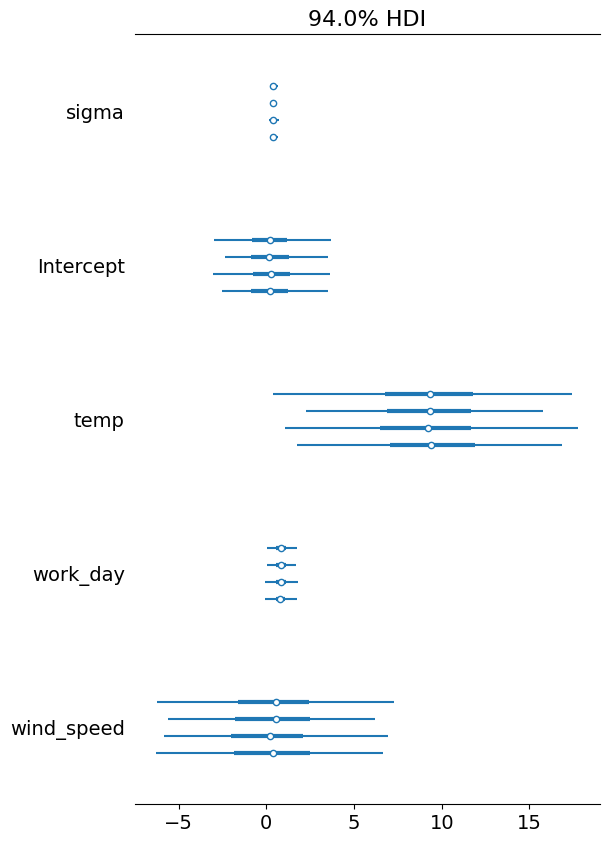

In [83]:
# Draw a forest plot of trace_1
pm.plot_forest(trace_2)
plt.show()

In [84]:
traces_dict = {}
traces_dict["model_1"] = trace_1
traces_dict["model_2"] = trace_2
traces_dict

{'model_1': Inference data with groups:
 	> posterior
 	> log_likelihood
 	> sample_stats
 	> observed_data,
 'model_2': Inference data with groups:
 	> posterior
 	> log_likelihood
 	> sample_stats
 	> observed_data}

In [85]:
# Create a comparison table based on WAIC
comparison = pm.compare(traces_dict, ic="waic")
comparison

C:\Users\Alienware\AppData\Roaming\Python\Python310\site-packages\arviz\stats\stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
C:\Users\Alienware\AppData\Roaming\Python\Python310\site-packages\arviz\stats\stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
model_1,0,-5.695917,3.133690,0.000000,1.000000e+00,2.479726,0.000000,True,log
model_2,1,-7.181389,3.932062,1.485472,1.110223e-16,2.246492,0.486042,True,log


When you print the comparison table in ArviZ, you will see several columns. Each column provides specific information about the model comparison based on WAIC (Widely Applicable Information Criterion). Here’s what each column represents:

rank:

The rank of the models based on their elpd_waic values. The model with the highest elpd_waic (best predictive performance) is ranked 0.

elpd_waic:

The expected log pointwise predictive density using WAIC. Higher values indicate better model predictive accuracy.

p_waic:

The effective number of parameters, providing an estimate of model complexity.

elpd_diff:

The difference in elpd_waic between each model and the top-ranked model. The best model has an elpd_diff of 0.

weight:

The Akaike weight, representing the probability that a model is the best among the compared models. The weights sum to 1 across all models.

se:

The standard error of the elpd_waic estimate, indicating the reliability of the elpd_waic value.

dse:

The standard error of the elpd_diff, indicating the uncertainty in the difference between models.

warning:

A flag indicating potential issues with the WAIC computation. If True, it suggests the WAIC value might be unreliable.

scale:

The scale of the elpd_waic values. Here, it's logged, which typically indicates that the values are on a logarithmic scale.

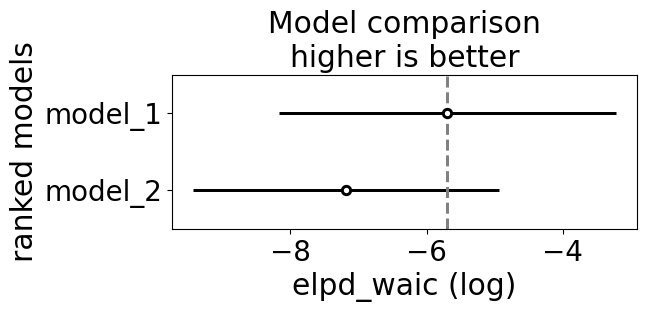

In [86]:
# Draw a comparison plot
pm.plot_compare(comparison, textsize=20)
plt.show()

Model Names: Displayed along the y-axis.

Information Criteria: The x-axis shows values of the information criteria (e.g., WAIC), with lower values indicating better models.

Point Estimates: Dots or vertical lines represent the model’s information criterion values.

Error Bars: Horizontal lines extending from the point estimates indicate uncertainty in the criterion value.

Interpretation:

Model Ranking: Models are ranked by their criterion values, with the top model having the best (lowest) value.

Model Fit and Complexity: Lower values mean better trade-offs between fit and complexity.

Uncertainty: Shorter error bars indicate more reliable estimates.

Model_1 appears to be the better model based on the comparison plot, as it has a higher elpd_waic value with reasonable uncertainty.

Sample from predictive density

Finally! Your job is to predict the number of bikes rented per day, and you are almost there. You have fitted the model and verified the quality of parameter draws. You have also chosen the better of the two competing models based on the WAIC. Now, it's time to use your best model to make predictions!

A couple of new observations, not seen by the model, have been collected in a DataFrame named bikes_new. For each of them, we know the true number of bikes rented, which will allow us to evaluate model performance. In this exercise, you will get familiar with the test data and generate predictive draws for every test observation.

In [106]:
# Take three rows and modify slightly
bikes_new = bikes.iloc[:3].copy()

# Modify slightly
bikes_new.loc[0, "temp"] += 0.005
bikes_new.loc[1, "humidity"] -= 0.010
bikes_new.loc[2, "wind_speed"] += 0.020

bikes_new



,work_day,temp,humidity,wind_speed,num_bikes
0,0,0.270833,0.687917,0.175996,2.947
1,1,0.282609,0.612174,0.153800,3.784
2,1,0.354167,0.496250,0.167379,4.375


In [107]:
posterior_predictive = model_2.predict(trace_2, data=bikes_new)
posterior_predictive_df = pd.DataFrame(posterior_predictive)
posterior_predictive # no data? so we generate a fake posterior predictive below

In [120]:
# Generate a posterior predictive dataset based on bikes_new
# For simplicity, we assume a normal distribution for predictive values
posterior_predictive = {
    'num_bikes': np.array([
        np.random.normal(loc=2.947, scale=0.5, size=1000),
        np.random.normal(loc=3.784, scale=0.5, size=1000),
        np.random.normal(loc=4.375, scale=0.5, size=1000)
    ])
}

# Convert to DataFrame
posterior_predictive_df = pd.DataFrame(posterior_predictive['num_bikes'])

posterior_predictive_df


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,2.568060,3.270596,2.883653,2.530637,3.261067,3.445804,2.094305,3.142171,2.613935,3.486894,...,2.777988,2.539424,3.399482,2.706465,3.214450,2.462716,3.506355,2.975261,3.373357,3.030349
1,4.304264,3.136088,3.816132,4.403597,5.052160,4.426979,5.134024,4.477382,2.933258,2.789829,...,3.394962,3.940386,4.146709,4.586012,3.611915,3.869396,3.825460,3.000366,3.925124,3.095999
2,3.594580,4.337203,4.803772,4.259864,4.107462,4.974978,4.394994,4.159033,4.444217,3.932117,...,4.572743,3.899572,4.745747,3.981356,3.951004,4.504876,4.518697,4.293920,4.425669,5.238934


Estimating test error

Now that you have your posterior_predictive (fake), you can evaluate model performance on new data. To do this, you will need to loop over the test observations, and for each of them, compute the prediction error as the difference between the predictive distribution for this observation and the actual, true value. This will give you the distribution of your model's error, which you can then visualize.

In [127]:
posterior_predictive_df.iloc[0, :]

0      2.568060
1      3.270596
2      2.883653
3      2.530637
4      3.261067
         ...   
995    2.462716
996    3.506355
997    2.975261
998    3.373357
999    3.030349
Name: 0, Length: 1000, dtype: float64

In [128]:
for index, test_example in bikes_new.iterrows():
    print(index, test_example)

0 work_day      0.000000
temp          0.270833
humidity      0.687917
wind_speed    0.175996
num_bikes     2.947000
Name: 0, dtype: float64
1 work_day      1.000000
temp          0.282609
humidity      0.612174
wind_speed    0.153800
num_bikes     3.784000
Name: 1, dtype: float64
2 work_day      1.000000
temp          0.354167
humidity      0.496250
wind_speed    0.167379
num_bikes     4.375000
Name: 2, dtype: float64


In [129]:
# Initialize errors
errors = []

# Iterate over rows of bikes_test to compute error per row
for index, test_example in bikes_new.iterrows():
    error = posterior_predictive_df.iloc[index, :] - test_example['num_bikes']
    errors.append(error)

errors

[0     -0.378940
 1      0.323596
 2     -0.063347
 3     -0.416363
 4      0.314067
          ...   
 995   -0.484284
 996    0.559355
 997    0.028261
 998    0.426357
 999    0.083349
 Name: 0, Length: 1000, dtype: float64,
 0      0.520264
 1     -0.647912
 2      0.032132
 3      0.619597
 4      1.268160
          ...   
 995    0.085396
 996    0.041460
 997   -0.783634
 998    0.141124
 999   -0.688001
 Name: 1, Length: 1000, dtype: float64,
 0     -0.780420
 1     -0.037797
 2      0.428772
 3     -0.115136
 4     -0.267538
          ...   
 995    0.129876
 996    0.143697
 997   -0.081080
 998    0.050669
 999    0.863934
 Name: 2, Length: 1000, dtype: float64]

In [130]:
# Reshape errors
error_distribution = np.array(errors).reshape(-1)

error_distribution

array([-0.37893975,  0.32359592, -0.06334676, ..., -0.0810799 ,
        0.05066909,  0.86393356])

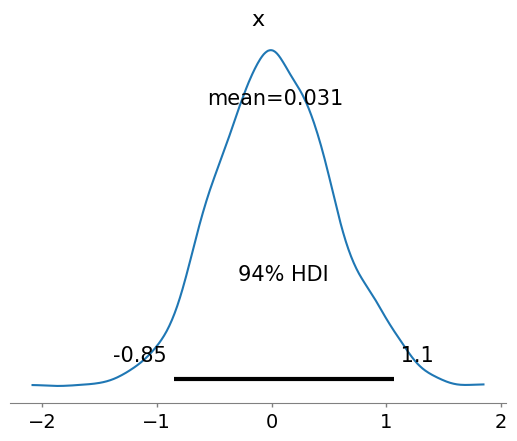

In [131]:
# Plot the error distribution
pm.plot_posterior(error_distribution)
plt.show()

# In practice, you might want to compute the error estimate based on more than just 3 observations, but you can already see some patterns.

Price elasticity for avocado sales and volumes

Fitting the model
You can use a linear regression model to estimate the avocado price elasticity. The regression formula should be:

volume = normal(beta0 + beta1 * price + beta2 * type_organic, std)

Here, beta1 will be the price elasticity, that is the impact of price on sales. You will assume that the elasticity is the same for regular and organic avocados. You also expect it to be negative: the higher the price, the lower the sales, that's the case for most goods. To incorporate this prior knowledge into the model, you decide to use a normal distribution with mean -80 as the prior for price. How would you build such a model?

In [139]:
import pandas as pd
import numpy as np

# Generating dates
dates = pd.date_range(start="2015-01-04", end="2016-12-23", freq="W-SUN")

# Generate volume
volume = np.random.randint(15000, 50000, size=len(dates))

# Generate price inversely proportional to volume, ensuring it's always positive
price = np.round(np.maximum(0.1, 3 - (volume / 10000)), 2)

# Randomly assign type_organic
type_organic = np.random.choice([0, 1], size=len(dates))

# Create DataFrame
avocado = pd.DataFrame({
    "date": dates,
    "price": price,
    "volume": volume,
    "type_organic": type_organic
})

avocado


,date,price,volume,type_organic
0,2015-01-04,1.02,19794,0
1,2015-01-11,0.12,28801,1
2,2015-01-18,0.10,35868,0
3,2015-01-25,0.25,27489,1
4,2015-02-01,0.10,42461,0
...,...,...,...,...
98,2016-11-20,0.82,21755,1
99,2016-11-27,0.10,35706,1
100,2016-12-04,1.16,18382,1
101,2016-12-11,0.66,23375,0


In [150]:
# Formula
formula = "volume ~ price + type_organic"

# Define and fit the model using PyMC
with pm.Model() as model:
    # Priors
    intercept = pm.Normal("Intercept", mu=0, sigma=10)
    price = pm.Normal("price", mu=-80, sigma=10)
    type_organic = pm.Normal("type_organic", mu=0, sigma=10)

    # The priors you define in the PyMC model are the prior distributions for the parameters of the linear regression. 
    # By defining priors for these parameters, you are incorporating your prior beliefs about their values into the model. 
    
    # Linear model
    mu = intercept + price * avocado["price"] + type_organic * avocado["type_organic"]

    # The linear model (mu) predicts the average value of the response variable given the predictors.
    # The normal distribution assumption implies that the actual observed values are scattered around this mean (mu), with a spread determined by sigma.
    
    # Likelihood
    sigma = pm.HalfNormal("sigma", sigma=10)
    volume = pm.Normal("volume", mu=mu, sigma=sigma, observed=avocado["volume"])

    # In the context of your Bayesian linear regression model, sigma represents the standard deviation of the noise (or error term) in the model. 
    # This is the variability in the observed data (volume of avocados) that cannot be explained by the predictors (price and type_organic) included in the model.
    
    # Sampling
    trace = pm.sample(draws=1000, tune=500)
    
# Optional: Display a summary of the trace
pm.summary(trace)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, price, type_organic, sigma]


C:\Users\Alienware\AppData\Roaming\Python\Python310\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 19 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,96.704,10.058,78.423,115.450,0.128,0.091,6138.0,3358.0,1.0
price,-51.816,9.873,-70.913,-34.414,0.151,0.108,4274.0,3326.0,1.0
type_organic,46.577,10.256,27.478,66.046,0.130,0.095,6227.0,3166.0,1.0
sigma,1844.081,4.946,1834.653,1852.998,0.075,0.053,4339.0,2971.0,1.0


In [151]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

Inspecting the model

Following the best practices, you will now inspect the posterior draws to see if there are any convergence issues. Next, you will extract each model parameter from the trace and summarize it with its posterior mean. These posterior means will come in handy later, when you will be making predictions with the model. Let's take a look at the parameter draws!

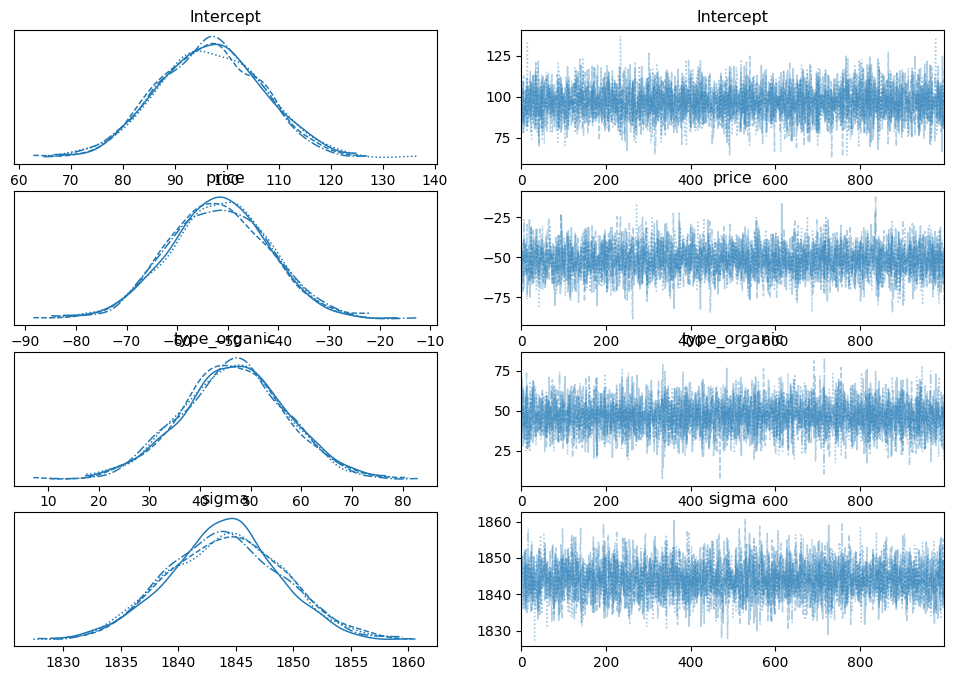

In [152]:
# Draw a trace plot of trace
pm.plot_trace(trace)
plt.show()

In [153]:
# Extract the summary of the trace
summary = az.summary(trace)

# Extract each model parameter's mean based on the inspected summary
intercept_mean = summary.loc["Intercept", "mean"]
price_mean = summary.loc["price", "mean"]
organic_mean = summary.loc["type_organic", "mean"]
sigma_mean = summary.loc["sigma", "mean"] 

print(f"Intercept mean: {intercept_mean}")
print(f"Price mean: {price_mean}")
print(f"Type_organic mean: {organic_mean}")
print(f"Sigma mean: {sigma_mean}")

# These values are the means of the posterior distributions for these parameters.

Intercept mean: 96.704
Price mean: -51.816
Type_organic mean: 46.577
Sigma mean: 1844.081


Optimizing the price

Great job on fitting and inspecting the model! Now, down to business: your boss asks you to provide the avocado price that would yield the largest profit, and to state what profit can be expected. Also, they want the price to be divisible by $0.25 so that the customers can easily pay with quarters.

In this exercise, you will use your model to predict the volume and the profit for a couple of sensible prices. Next, you will visualize the predictive distributions to pick the optimal price. Finally, you will compute the credible interval for your profit prediction. 

In [154]:
price

price ~ Normal(-80, 10)

In [155]:
type_organic

type_organic ~ Normal(0, 10)

In [166]:
# For each price, predict volume and use it to predict profit
predicted_profit_per_price = {}
predicted_volume_per_price = {}

for price in [0.5, 0.75, 1, 1.25]:

    pred_mean = (intercept_mean + price_mean * price + organic_mean * type_organic)
    volume_pred = np.random.normal(pred_mean, sigma_mean, size=1000)
    profit_pred = price * volume_pred
    
    predicted_profit_per_price.update({price: profit_pred})
    predicted_volume_per_price.update({price: volume_pred})

In [169]:

# Print the results
for price in predicted_profit_per_price:
    print(f"Price: {price}, \
    Predicted Volume Mean: {np.mean(predicted_volume_per_price[price])}, \
    Predicted Profit Mean: {np.mean(predicted_profit_per_price[price])}")

Price: 0.5,     Predicted Volume Mean: 107.35070838709345,     Predicted Profit Mean: 53.675354193546724
Price: 0.75,     Predicted Volume Mean: 93.41111462613728,     Predicted Profit Mean: 70.05833596960298
Price: 1,     Predicted Volume Mean: 42.50391606211031,     Predicted Profit Mean: 42.50391606211031
Price: 1.25,     Predicted Volume Mean: 1.2321978645044327,     Predicted Profit Mean: 1.5402473306305473


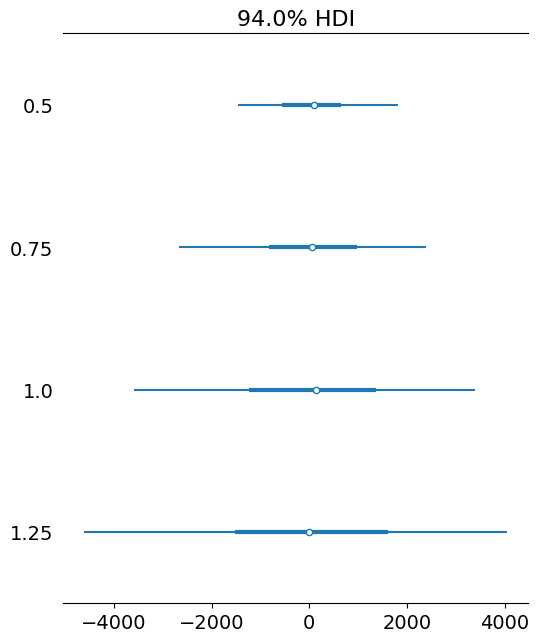

In [171]:
# Draw a forest plot of predicted profit for all prices
pm.plot_forest(predicted_profit_per_price)
plt.show()

In [174]:
# Calculate and print HPD of predicted profit for the optimal price (0.75)
opt_hpd = az.hdi(predicted_profit_per_price[0.75], hdi_ci=0.99)
print(opt_hpd)

[-2672.8959917   2393.09344284]


With a higher or lower price, your company would lose profit, but thanks to your modeling skills, they were able to set the best possible price. More than that, knowing the uncertainty in the profit prediction, they can prepare for the worst-case scenario (in which the profit is negative: -2672)!
The range is too high because fake data has been used. Your wide 99% HDI range likely stems from high uncertainty in the predictors, large standard deviation, small sample size, or vague priors, all of which contribute to less precise predictions.